# Exploring Bike Share Data: Visualizing the effects of a global pandemic on San Francisco Bay Area's bike share system
## by Maren Zoller

This document explores bike share data from San Francisco Bay Area's Bay Wheels bike share system (previously Ford GoBike). Bay Wheels is operated by Lyft, and provides its bikes in the San Francisco, San Jose, and East Bay area. A docked bike can be checked out at any station and must be returned to a station when the trip is complete. Bay Wheels trip data is open for public use. The system data offers information on start and end station location, start and end date and time of the trip, and some additional information on the bike user, and the bike in use. Within this document, I will explore and compare the data from the first half year of 2019 and the first half year of 2020.

### Table of Contents
<ul>
<li><a href="#prewrangling">Preliminary Wrangling</a></li>
    <ul>
        <li><a href="#loading">Loading in the Bike Share Data</a></li>
        <li><a href="#assess19">Assessing the 2019 Bike Share Data</a></li>
        <li><a href="#assess20">Assessing the 2020 Bike Share Data</a></li>
        <li><a href="#clean19">Cleaning the 2019 Bike Share Data</a></li>
        <li><a href="#clean20">Cleaning the 2020 Bike Share Data</a></li>
    </ul>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id='prewrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='loading'></a>
### Loading in the bike share data 

In [2]:
# January to June 2019 bike share data
datafiles_19 = ['201901-fordgobike-tripdata.csv','201902-fordgobike-tripdata.csv','201903-fordgobike-tripdata.csv',
                '201904-fordgobike-tripdata.csv', '201905-baywheels-tripdata.csv', '201906-baywheels-tripdata.csv']
# January to June 2020 bike share data
datafiles_20 = ['202001-baywheels-tripdata.csv','202002-baywheels-tripdata.csv',
                '202003-baywheels-tripdata.csv', '202004-baywheels-tripdata.csv',
                '202005-baywheels-tripdata.csv', '202006-baywheels-tripdata.csv']

# initializing empty dataframes
df_19 = pd.DataFrame()
df_20 = pd.DataFrame()

# looping through 2019 data files, reading them into 2019 dataframe
for file in datafiles_19:
    if df_19.empty:
        df_19 = pd.read_csv(file, low_memory=False)
    else:
        df1_19 = pd.read_csv(file, low_memory=False)
        df_19 = pd.concat([df_19, df1_19], ignore_index=True)
        print('Number of rows in df_19: {}, after loading {}'.format(df_19.shape[0], file))
df_19.reset_index(drop=True, inplace=True)

# looping through 2020 data files, reading them into 2020 dataframe
for file in datafiles_20:
    if df_20.empty:
        df_20 = pd.read_csv(file, low_memory=False)
    else:
        df1_20 = pd.read_csv(file, low_memory=False)
        df_20 = pd.concat([df_20, df1_20], ignore_index=True)
        print('Number of rows in df_20: {}, after loading {}'.format(df_20.shape[0], file))
df_20.reset_index(drop=True, inplace=True)

Number of rows in df_19: 375494, after loading 201902-fordgobike-tripdata.csv
Number of rows in df_19: 631793, after loading 201903-fordgobike-tripdata.csv
Number of rows in df_19: 870904, after loading 201904-fordgobike-tripdata.csv
Number of rows in df_19: 1053067, after loading 201905-baywheels-tripdata.csv
Number of rows in df_19: 1244839, after loading 201906-baywheels-tripdata.csv
Number of rows in df_20: 728208, after loading 202002-baywheels-tripdata.csv
Number of rows in df_20: 905007, after loading 202003-baywheels-tripdata.csv
Number of rows in df_20: 989266, after loading 202004-baywheels-tripdata.csv
Number of rows in df_20: 1127517, after loading 202005-baywheels-tripdata.csv
Number of rows in df_20: 1285685, after loading 202006-baywheels-tripdata.csv


<a id='assess19'></a>
### Assessing the 2019 bike share data

First the datasets, will be assessed programmatically, using .head(), .shape, .info(), and .describe().

In [3]:
# assessing the top 5 rows in the dataset
df_19.head()

duration_sec                start_time                  end_time  \
0         80825  2019-01-31 17:57:44.6130  2019-02-01 16:24:49.8640   
1         65900  2019-01-31 20:58:33.8860  2019-02-01 15:16:54.1730   
2         62633  2019-01-31 18:06:52.9240  2019-02-01 11:30:46.5300   
3         44680  2019-01-31 19:46:09.7190  2019-02-01 08:10:50.3180   
4         60709  2019-01-31 14:19:01.5410  2019-02-01 07:10:51.0650   

   start_station_id           start_station_name  start_station_latitude  \
0             229.0    Foothill Blvd at 42nd Ave               37.775745   
1               4.0  Cyril Magnin St at Ellis St               37.785881   
2             245.0       Downtown Berkeley BART               37.870139   
3              85.0      Church St at Duboce Ave               37.770083   
4              16.0      Steuart St at Market St               37.794130   

   start_station_longitude  end_station_id              end_station_name  \
0              -122.213037           196.0       Grand Ave at Perkins St   
1              -122.408915           134.0        Valencia St at 24th St   
2              -122.268422           157.0          65th St at Hollis St   
3              -122.429156            53.0        Grove St at Divisadero   
4              -122.394430            28.0  The Embarcadero at Bryant St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0             37.808894            -122.256460     4861  Subscriber   
1             37.752428            -122.420628     5506  Subscriber   
2             37.846784            -122.291376     2717    Customer   
3             37.775946            -122.437777     4557    Customer   
4             37.787168            -122.388098     2100    Customer   

  bike_share_for_all_trip rental_access_method  
0                      No                  NaN  
1                      No                  NaN  
2                      No                  NaN  
3                      No                  NaN  
4                      No                  NaN

In [4]:
# assessing the number of rows and columns in the dataset
df_19.shape

(1244839, 15)

In [5]:
# assessing null-values and datatypes
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1244839 non-null  int64  
 1   start_time               1244839 non-null  object 
 2   end_time                 1244839 non-null  object 
 3   start_station_id         1241934 non-null  float64
 4   start_station_name       1241934 non-null  object 
 5   start_station_latitude   1244839 non-null  float64
 6   start_station_longitude  1244839 non-null  float64
 7   end_station_id           1241832 non-null  float64
 8   end_station_name         1241832 non-null  object 
 9   end_station_latitude     1244839 non-null  float64
 10  end_station_longitude    1244839 non-null  float64
 11  bike_id                  1244839 non-null  int64  
 12  user_type                1244839 non-null  object 
 13  bike_share_for_all_trip  1240946 non-null 

In [6]:
# assessing summary statistics
df_19.describe()

duration_sec  start_station_id  start_station_latitude  \
count  1.244839e+06      1.241934e+06            1.244839e+06   
mean   7.889839e+02      1.395057e+02            3.776890e+01   
std    1.898254e+03      1.149337e+02            1.078549e-01   
min    6.000000e+01      3.000000e+00            0.000000e+00   
25%    3.450000e+02      4.400000e+01            3.777008e+01   
50%    5.500000e+02      1.010000e+02            3.778076e+01   
75%    8.600000e+02      2.380000e+02            3.779647e+01   
max    8.611400e+04      4.430000e+02            4.551000e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.244839e+06    1.241832e+06          1.244839e+06   
mean             -1.223526e+02    1.377684e+02          3.776855e+01   
std               1.680105e-01    1.147682e+02          1.763340e-01   
min              -1.224537e+02    3.000000e+00          0.000000e+00   
25%              -1.224125e+02    4.300000e+01          3.777041e+01   
50%              -1.223984e+02    9.900000e+01          3.778095e+01   
75%              -1.222914e+02    2.320000e+02          3.779728e+01   
max               0.000000e+00    4.430000e+02          4.551000e+01   

       end_station_longitude       bike_id  
count           1.244839e+06  1.244839e+06  
mean           -1.223505e+02  4.924267e+03  
std             4.822376e-01  2.696151e+04  
min            -1.224537e+02  1.100000e+01  
25%            -1.224117e+02  1.832000e+03  
50%            -1.223981e+02  3.614000e+03  
75%            -1.222914e+02  5.296000e+03  
max             0.000000e+00  9.851100e+05

user_type, bike_share_for_all_trip, and rental_access_method seem like they can be used for categorical explorations, assessing their values will help to confirm this. 

In [7]:
# assessing value counts
print(df_19.user_type.value_counts())
print(df_19.bike_share_for_all_trip.value_counts())
print(df_19.rental_access_method.value_counts())

Subscriber    1069710
Customer       175129
Name: user_type, dtype: int64
No     1136609
Yes     104337
Name: bike_share_for_all_trip, dtype: int64
app        3379
clipper     514
Name: rental_access_method, dtype: int64


As expected, the above variables can be used for categorization. Next up, the station locations are assessed. This will be limited to the start stations. They will be assessed via a visualization of spatial data in a scatter plot. 

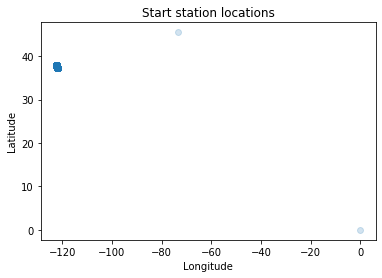

In [8]:
# Assessing station location
plt.scatter(data = df_19, x = 'start_station_longitude', y = 'start_station_latitude', alpha = 0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Start station locations');

The summary statistics already showed outliers, in the visualization they become more obvious. Next, I am visualizing the spatial data again, this time excluding outliers and zooming in using .xlim and .ylim parameters.

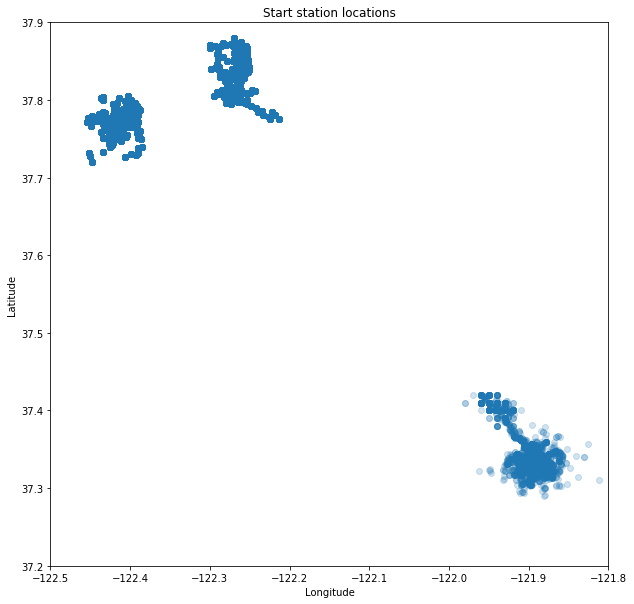

In [9]:
# Assessing station location - excluding outliers, utilizing axis limits
plt.figure(figsize=[10, 10])
plt.scatter(data = df_19, x = 'start_station_longitude', y = 'start_station_latitude', alpha = 0.2)
plt.xlim((-122.5,-121.8))
plt.ylim((37.2,37.9))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Start station locations')
plt.show();

After assessing the 2019 data, the following data quality issues arise: 
- start_time and end_time should be datetime series instead of objects
- start_station_id, and end_station_id should be either integers or strings instead of floats
- user_type and bike_share_for_all_trip should be categorical
- the minimum for start_station_latitude and end_station_latitude and maximum for start_station_longitude and end_station_longitude is 0, this points toward a data quality issue. Also, there is an outlier station at around 75 latitude, 45.5 longitude.  
- start_station_id, start_station_name, end_station_id, and end_station_name have 5 (start) and 7 (end) missing values.
- bike_share_for_all_trip and rental_access_method have missing values.

Additionally, there are a few issues, that I want to clean for convenience and later use in the exploration:
- Convert duration_sec to duration_min
- Extract weekday, hour and month data from start_time

To achieve data tidiness, the latitude and longitude data could be used to categorise the stations into cities. 

<a id='assess20'></a>
### Assessing the 2020 bike share data

In [10]:
# assessing the first five rows of the 2020 dataset
df_20.head()

duration_sec                start_time                  end_time  \
0       83118.0  2020-01-31 15:23:47.7330  2020-02-01 14:29:06.2630   
1       68239.0  2020-01-31 15:40:31.6160  2020-02-01 10:37:51.0000   
2       55407.0  2020-01-31 17:48:16.6350  2020-02-01 09:11:44.3170   
3       54929.0  2020-01-31 17:53:03.4130  2020-02-01 09:08:32.6340   
4       55700.0  2020-01-31 17:12:33.4600  2020-02-01 08:40:53.6460   

   start_station_id             start_station_name  start_station_latitude  \
0             400.0  Buchanan St at North Point St               37.804272   
1              99.0           Folsom St at 15th St               37.767037   
2             197.0    El Embarcadero at Grand Ave               37.808848   
3             197.0    El Embarcadero at Grand Ave               37.808848   
4              12.0    Pier 1/2 at The Embarcadero               37.796389   

   start_station_longitude  end_station_id               end_station_name  \
0              -122.433537           400.0  Buchanan St at North Point St   
1              -122.415443            99.0           Folsom St at 15th St   
2              -122.249680           197.0    El Embarcadero at Grand Ave   
3              -122.249680           197.0    El Embarcadero at Grand Ave   
4              -122.394586           371.0     Lombard St at Columbus Ave   

   end_station_latitude  ...  ride_id  rideable_type started_at ended_at  \
0             37.804272  ...      NaN            NaN        NaN      NaN   
1             37.767037  ...      NaN            NaN        NaN      NaN   
2             37.808848  ...      NaN            NaN        NaN      NaN   
3             37.808848  ...      NaN            NaN        NaN      NaN   
4             37.802746  ...      NaN            NaN        NaN      NaN   

  start_lat start_lng end_lat end_lng  member_casual  is_equity  
0       NaN       NaN     NaN     NaN            NaN        NaN  
1       NaN       NaN     NaN     NaN            NaN        NaN  
2       NaN       NaN     NaN     NaN            NaN        NaN  
3       NaN       NaN     NaN     NaN            NaN        NaN  
4       NaN       NaN     NaN     NaN            NaN        NaN  

[5 rows x 24 columns]

In [11]:
# assessing the number of rows and columns in the dataset
df_20.shape

(1285685, 24)

In [12]:
# assessing null-values and datatypes
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285685 entries, 0 to 1285684
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  float64
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         658674 non-null  float64
 4   start_station_name       659907 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           653013 non-null  float64
 8   end_station_name         654287 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  float64
 12  user_type                905007 non-null  object 
 13  rental_access_method     617858 non-null  object 
 14  ri

In [13]:
# assessing summary statistics
df_20.describe()

duration_sec  start_station_id  start_station_latitude  \
count  905007.000000     658674.000000           905007.000000   
mean      806.783430        193.613785               37.747956   
std      1651.803494        157.028989                0.229245   
min        60.000000          3.000000                0.000000   
25%       370.000000         60.000000               37.765281   
50%       595.000000        133.000000               37.776972   
75%       932.000000        338.000000               37.789914   
max    811077.000000        532.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            905007.000000   653013.000000         905007.000000   
mean               -122.356863      187.972691             37.747504   
std                   0.646076      156.664200              0.270214   
min                -122.514230        3.000000              0.000000   
25%                -122.420664       58.000000             37.765464   
50%                -122.404635      127.000000             37.777062   
75%                -122.392741      323.000000             37.790229   
max                   0.000000      532.000000             37.995942   

       end_station_longitude        bike_id      start_lat      start_lng  \
count          905007.000000  905007.000000  380678.000000  380678.000000   
mean             -122.354743  345257.165427      37.722349    -122.342257   
std                 0.795225  305503.123238       0.151551       0.182445   
min              -122.575763      12.000000      37.239200    -122.514300   
25%              -122.419957   12114.000000      37.760000    -122.432100   
50%              -122.403681  326439.000000      37.773506    -122.411800   
75%              -122.392741  557460.000000      37.787500    -122.390200   
max                 0.000000  999960.000000      37.880222    -121.770000   

             end_lat        end_lng  
count  380036.000000  380036.000000  
mean       37.722295    -122.342487  
std         0.151621       0.182584  
min        37.004600    -122.559000  
25%        37.760000    -122.431946  
50%        37.773500    -122.411800  
75%        37.787710    -122.390288  
max        37.962100    -121.560600

In [14]:
# assessing value counts of potential categorical variables
print(df_20.user_type.value_counts())
print(df_20.rental_access_method.value_counts())
print(df_20.rideable_type.value_counts())
print(df_20.member_casual.value_counts())
print(df_20.is_equity.value_counts())

Subscriber    544696
Customer      360311
Name: user_type, dtype: int64
app        570471
clipper     47387
Name: rental_access_method, dtype: int64
electric_bike    261137
docked_bike      119541
Name: rideable_type, dtype: int64
casual    226098
member    154580
Name: member_casual, dtype: int64
False    129548
True       8703
Name: is_equity, dtype: int64


Within the 2020 dataset, there are a lot more columns than in the 2019 dataset. It seems, that some columns were added, some removed, and others replaced with new renamed columns. Next, I am evaluating when the new columns were introduced.

In [15]:
# sampling the minimum time start time of one of the new columns, to get an idea in which month they were introduced
docked_bikes = df_20.query("rideable_type == 'docked_bike'")
docked_bikes.started_at.min()

'2020-04-01 00:00:38'

In [16]:
# assessing null values and non-null values at above start time
df_20.query("started_at == '2020-04-01 00:00:38'").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 978303 to 978303
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             0 non-null      float64
 1   start_time               0 non-null      object 
 2   end_time                 0 non-null      object 
 3   start_station_id         1 non-null      float64
 4   start_station_name       1 non-null      object 
 5   start_station_latitude   0 non-null      float64
 6   start_station_longitude  0 non-null      float64
 7   end_station_id           1 non-null      float64
 8   end_station_name         1 non-null      object 
 9   end_station_latitude     0 non-null      float64
 10  end_station_longitude    0 non-null      float64
 11  bike_id                  0 non-null      float64
 12  user_type                0 non-null      object 
 13  rental_access_method     0 non-null      object 
 14  ride_id             

It is still a bit unclear to me, if ride_id refers to individual trips or replaces the bike_id. Therefore I am assessing the number of unique values for this variable.

In [17]:
df_20.ride_id.nunique()

380678

ride_id seems individual to trips, not bikes. Next, I am again assessing start station spatial data. 

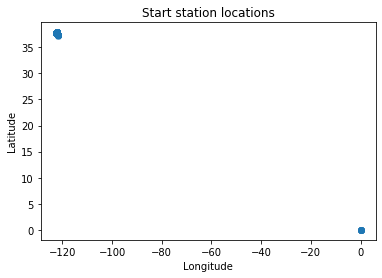

In [18]:
# Assessing station location
plt.scatter(data = df_20, x = 'start_station_longitude', y = 'start_station_latitude', alpha = 0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Start station locations');

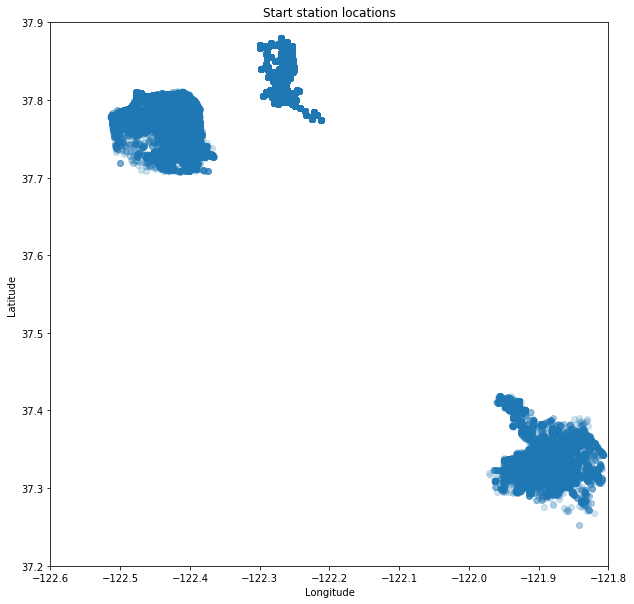

In [19]:
# Assessing station location - excluding outliers, utilizing axis limits
plt.figure(figsize=[10, 10])
plt.scatter(data = df_20, x = 'start_station_longitude', y = 'start_station_latitude', alpha = 0.2)
plt.xlim((-122.6,-121.8))
plt.ylim((37.2,37.9))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Start station locations')
plt.show();

The above spatial representation of stations looks very crowded. Either, there has been a huge increase in station density since 2019, or there are multiple latitudes and longitudes per station. I will assess this further in the exploration phase. 

After assessing the 2020 data, the following data quality issues arise: 
- start_time and end_time should be datetime series instead of objects
- start_station_id and end_station_id should be either integers or strings instead of floats
- user_type and member_casual should be categorical
- the minimum for start_station_latitude and end_station_latitude and the maximum for start_station_longitude and end_station_longitude is 0, this points toward a data quality issue. 
- During the year, some columns have been renamed. From April onwards, start_station_latitude is start_lat, start_station_longitude is start_long. The same changes were made for the end_station. start_time and end_time are renamed to started_at and ended_at.
- user_type is changed to member_casual, with casual corresponding to customer, and member corresponding to subscriber (https://www.lyft.com/bikes/bay-wheels/system-data)
- bike_id is replaced by ride_id. Whereas bike_id is unique to a bike, ride_id is unique to a ride. Therefore this is not a 1:1 replacement, meaning that bike_id info is only available before April 1st, and ride_id info only from April 1st onwards.
- duration_sec is not available from April onwards. The value has to be calculated from start_time and end_time and started_at and ended_at respectively. As there might be data entry/transmission errors in this column, I will recalculate duration_sec from the start and end time in both datasets.
- is_equity has only around 10% non-null values, and it is unclear, what type of information it conveys.
- end_lat and end_lng has 42 missing values. 
- start_station_id, start_station_name, end_station_id, and end_station_name are only available in about 50% of the rows. 

Additionally, there are a few issues, that I want to clean for convenience and later use in the exploration:
- Convert duration_sec to duration_min
- Extract weekday, hour and month data from start_time

To achieve data tidiness, the latitude and longitude data could be used to categorise the stations into cities. 

### Cleaning the bike share data

<a id='clean19'></a>
#### 2019

In [20]:
# Creating a copy of the original 2019 dataframe
df_19_clean = df_19.copy()

Converting start_time and end_time to datetime series, extracting weekday, month, and hour of the day:

In [21]:
df_19_clean.start_time = pd.to_datetime(df_19_clean.start_time)
df_19_clean.end_time = pd.to_datetime(df_19_clean.end_time)

df_19_clean['week_day'] = df_19_clean.start_time.dt.day_name()
df_19_clean['month'] = df_19_clean.start_time.dt.strftime("%b")
df_19_clean['hour'] = df_19_clean.start_time.dt.hour

Converting start and end station ids to string, then removing decimal digits:

In [22]:
df_19_clean.start_station_id = df_19_clean.start_station_id.astype(str)
df_19_clean.end_station_id = df_19_clean.end_station_id.astype(str)
df_19_clean.start_station_id = df_19_clean.start_station_id.apply(lambda x : x.split('.')[0])
df_19_clean.end_station_id = df_19_clean.end_station_id.apply(lambda x : x.split('.')[0])

Converting user_type, bike_share_for_all_trip, and rental_access_method to categorical types:

In [23]:
df_19_clean.user_type = df_19_clean.user_type.astype('category')
df_19_clean.bike_share_for_all_trip = df_19_clean.bike_share_for_all_trip.astype('category')
df_19_clean.rental_access_method = df_19_clean.rental_access_method.astype('category')
df_19_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1244839 non-null  int64         
 1   start_time               1244839 non-null  datetime64[ns]
 2   end_time                 1244839 non-null  datetime64[ns]
 3   start_station_id         1244839 non-null  object        
 4   start_station_name       1241934 non-null  object        
 5   start_station_latitude   1244839 non-null  float64       
 6   start_station_longitude  1244839 non-null  float64       
 7   end_station_id           1244839 non-null  object        
 8   end_station_name         1241832 non-null  object        
 9   end_station_latitude     1244839 non-null  float64       
 10  end_station_longitude    1244839 non-null  float64       
 11  bike_id                  1244839 non-null  int64         
 12  

Assessing and cleaning 0 values in latitude and longitude data:

In [24]:
# displaying station_ids for stations with latitude or longitude 0
display(df_19_clean.query('start_station_latitude == 0 or start_station_longitude == 0').start_station_id.unique())
display(df_19_clean.query('end_station_latitude == 0 or end_station_longitude == 0').end_station_id.unique())

array(['420'], dtype=object)

array(['420'], dtype=object)

The latitude and longitude 0 data is restricted to one station, 420. I will look at this station more closely.

In [25]:
# further assessing station 420
display(df_19_clean.query("start_station_id == '420'"), df_19_clean.query("end_station_id == '420'"))

duration_sec              start_time                end_time  \
672473           175 2019-04-24 16:56:54.516 2019-04-24 16:59:50.429   

       start_station_id start_station_name  start_station_latitude  \
672473              420    SF Test Station                     0.0   

        start_station_longitude end_station_id    end_station_name  \
672473                      0.0             81  Berry St at 4th St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
672473              37.77588             -122.39317     1161  Subscriber   

       bike_share_for_all_trip rental_access_method   week_day month  hour  
672473                      No                  NaN  Wednesday   Apr    16

duration_sec              start_time                end_time  \
632970          2365 2019-04-30 18:21:42.610 2019-04-30 19:01:08.146   
633736          1964 2019-04-30 17:31:19.646 2019-04-30 18:04:04.518   
633890           546 2019-04-30 17:45:38.452 2019-04-30 17:54:45.258   
633969           630 2019-04-30 17:39:33.507 2019-04-30 17:50:04.314   
634422           433 2019-04-30 17:17:10.486 2019-04-30 17:24:23.919   
634505          1233 2019-04-30 16:58:41.209 2019-04-30 17:19:14.689   
634537          1306 2019-04-30 16:55:35.924 2019-04-30 17:17:22.162   
634828           764 2019-04-30 16:44:12.351 2019-04-30 16:56:56.539   
647079          1491 2019-04-28 18:40:41.288 2019-04-28 19:05:33.063   
647132           680 2019-04-28 18:40:08.324 2019-04-28 18:51:28.357   
647247           764 2019-04-28 18:10:38.170 2019-04-28 18:23:22.476   
647248           904 2019-04-28 18:08:13.576 2019-04-28 18:23:18.367   
647279          1501 2019-04-28 17:52:27.345 2019-04-28 18:17:28.410   
647280          1503 2019-04-28 17:52:22.210 2019-04-28 18:17:25.545   
647299           840 2019-04-28 18:00:23.567 2019-04-28 18:14:23.599   
672515           195 2019-04-24 16:53:35.591 2019-04-24 16:56:51.006   
681412           921 2019-04-23 13:14:09.492 2019-04-23 13:29:31.333   
719613           912 2019-04-17 09:30:11.764 2019-04-17 09:45:24.263   

       start_station_id                                start_station_name  \
632970               50                             2nd St at Townsend St   
633736               98                            Valencia St at 16th St   
633890              370                               Jones St at Post St   
633969               21  Montgomery St BART Station (Market St at 2nd St)   
634422               11                            Davis St at Jackson St   
634505               81                                Berry St at 4th St   
634537               80                             Townsend St at 5th St   
634828               16                           Steuart St at Market St   
647079              377                             Fell St at Stanyan St   
647132              139          Garfield Square (25th St at Harrison St)   
647247              412                            Glen Park BART Station   
647248              412                            Glen Park BART Station   
647279              377                             Fell St at Stanyan St   
647280              377                             Fell St at Stanyan St   
647299               88                              11th St at Bryant St   
672515              104                                 4th St at 16th St   
681412               20   Mechanics Monument Plaza (Market St at Bush St)   
719613              399                             Bay St at Fillmore St   

        start_station_latitude  start_station_longitude end_station_id  \
632970               37.780526              -122.390288            420   
633736               37.765052              -122.421866            420   
633890               37.787327              -122.413278            420   
633969               37.789625              -122.400811            420   
634422               37.797280              -122.398436            420   
634505               37.775880              -122.393170            420   
634537               37.775235              -122.397437            420   
634828               37.794130              -122.394430            420   
647079               37.771917              -122.453704            420   
647132               37.751017              -122.411901            420   
647247               37.732813              -122.434140            420   
647248               37.732813              -122.434140            420   
647279               37.771917              -122.453704            420   
647280               37.771917              -122.453704            420   
647299               37.770030              -122.411726          

Station 420 is a test station, and can be dropped from the dataset.  

In [26]:
# dropping station 420 from the dataset
df_19_clean = df_19_clean.query("start_station_id != '420' and end_station_id != '420'")
df_19_clean.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  1.244820e+06            1.244820e+06             1.244820e+06   
mean   7.889806e+02            3.776893e+01            -1.223527e+02   
std    1.898267e+03            1.024056e-01             1.272867e-01   
min    6.000000e+01            3.729006e+01            -1.224537e+02   
25%    3.450000e+02            3.777008e+01            -1.224125e+02   
50%    5.500000e+02            3.778076e+01            -1.223984e+02   
75%    8.600000e+02            3.779647e+01            -1.222914e+02   
max    8.611400e+04            4.551000e+01            -7.357000e+01   

       end_station_latitude  end_station_longitude       bike_id          hour  
count          1.244820e+06           1.244820e+06  1.244820e+06  1.244820e+06  
mean           3.776909e+01          -1.223522e+02  4.924315e+03  1.359390e+01  
std            1.023098e-01           1.268605e-01  2.696171e+04  4.774296e+00  
min            3.725597e+01          -1.224537e+02  1.100000e+01  0.000000e+00  
25%            3.777041e+01          -1.224117e+02  1.832000e+03  9.000000e+00  
50%            3.778095e+01          -1.223981e+02  3.614500e+03  1.400000e+01  
75%            3.779728e+01          -1.222914e+02  5.296000e+03  1.700000e+01  
max            4.551000e+01          -7.357000e+01  9.851100e+05  2.300000e+01

Assessing and cleaning the stations with latitude 45.5 and longitude 73.5: 

At least one station has latitude 45.5 and longitude 73.5, this seems to be erranous data. 

In [27]:
# Assessing stations with start station latitude above 44
df_19_clean.query('start_station_latitude > 44')

duration_sec              start_time                end_time  \
1074201          4212 2019-06-27 07:31:51.684 2019-06-27 08:42:04.399   

        start_station_id start_station_name  start_station_latitude  \
1074201              408        MTL-ECO5-01                   45.51   

         start_station_longitude end_station_id end_station_name  \
1074201                   -73.57            408      MTL-ECO5-01   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
1074201                 45.51                 -73.57     6733  Subscriber   

        bike_share_for_all_trip rental_access_method  week_day month  hour  
1074201                      No                  NaN  Thursday   Jun     7

In [28]:
# does station 408 have other entries with different spatial data?
display(df_19_clean.query("start_station_id == '408'"), df_19_clean.query("end_station_id == '408'"))

duration_sec              start_time                end_time  \
1074201          4212 2019-06-27 07:31:51.684 2019-06-27 08:42:04.399   

        start_station_id start_station_name  start_station_latitude  \
1074201              408        MTL-ECO5-01                   45.51   

         start_station_longitude end_station_id end_station_name  \
1074201                   -73.57            408      MTL-ECO5-01   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
1074201                 45.51                 -73.57     6733  Subscriber   

        bike_share_for_all_trip rental_access_method  week_day month  hour  
1074201                      No                  NaN  Thursday   Jun     7

duration_sec              start_time                end_time  \
1074201          4212 2019-06-27 07:31:51.684 2019-06-27 08:42:04.399   

        start_station_id start_station_name  start_station_latitude  \
1074201              408        MTL-ECO5-01                   45.51   

         start_station_longitude end_station_id end_station_name  \
1074201                   -73.57            408      MTL-ECO5-01   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
1074201                 45.51                 -73.57     6733  Subscriber   

        bike_share_for_all_trip rental_access_method  week_day month  hour  
1074201                      No                  NaN  Thursday   Jun     7

Station 408 has a number and character code as station name, only one row in the entire dataset is affected. Therefore, I will drop station 408. 

In [29]:
# dropping station 408 from the dataset
df_19_clean = df_19_clean.query("start_station_id != '408' and end_station_id != '408'")
df_19_clean.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  1.244819e+06            1.244819e+06             1.244819e+06   
mean   7.889779e+02            3.776892e+01            -1.223527e+02   
std    1.898265e+03            1.021704e-01             1.195416e-01   
min    6.000000e+01            3.729006e+01            -1.224537e+02   
25%    3.450000e+02            3.777008e+01            -1.224125e+02   
50%    5.500000e+02            3.778076e+01            -1.223984e+02   
75%    8.600000e+02            3.779647e+01            -1.222914e+02   
max    8.611400e+04            3.788022e+01            -1.218117e+02   

       end_station_latitude  end_station_longitude       bike_id          hour  
count          1.244819e+06           1.244819e+06  1.244819e+06  1.244819e+06  
mean           3.776909e+01          -1.223523e+02  4.924314e+03  1.359390e+01  
std            1.020743e-01           1.190878e-01  2.696172e+04  4.774294e+00  
min            3.725597e+01          -1.224537e+02  1.100000e+01  0.000000e+00  
25%            3.777041e+01          -1.224117e+02  1.832000e+03  9.000000e+00  
50%            3.778095e+01          -1.223981e+02  3.614000e+03  1.400000e+01  
75%            3.779728e+01          -1.222914e+02  5.296000e+03  1.700000e+01  
max            3.788022e+01          -1.218117e+02  9.851100e+05  2.300000e+01

Dealing with missing start_station_ids, end_station_ids, start_station_names, and end_station_names:

start_station_id, start_station_name, end_station_id, end_station_name have missing values. This could have multiple reasons, e.g. a data entry or transfer problem (insufficient data, human error, encoding error). 
As this only affects a small percentage of rows, I am deciding to not further investigate, but drop the ones with a missing id, and keep the one with missing names. 

In [30]:
# dropping <NA> start_station_id and end_station_id rows from the dataset
df_19_clean = df_19_clean.query("start_station_id != '<NA>' and end_station_id != '<NA>'").reset_index(drop=True)
df_19_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244819 entries, 0 to 1244818
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1244819 non-null  int64         
 1   start_time               1244819 non-null  datetime64[ns]
 2   end_time                 1244819 non-null  datetime64[ns]
 3   start_station_id         1244819 non-null  object        
 4   start_station_name       1241914 non-null  object        
 5   start_station_latitude   1244819 non-null  float64       
 6   start_station_longitude  1244819 non-null  float64       
 7   end_station_id           1244819 non-null  object        
 8   end_station_name         1241812 non-null  object        
 9   end_station_latitude     1244819 non-null  float64       
 10  end_station_longitude    1244819 non-null  float64       
 11  bike_id                  1244819 non-null  int64         
 12  

Recalculating duration_sec:

Finally, I am recalculating the duration_sec from start_time and end_time, to make sure that all entries are correct.

In [31]:
df_19_clean.loc[:,['duration_sec']] = (df_19_clean['end_time'] - df_19_clean['start_time']).dt.seconds
df_19_clean.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  1.244819e+06            1.244819e+06             1.244819e+06   
mean   7.890171e+02            3.776892e+01            -1.223527e+02   
std    1.898867e+03            1.021704e-01             1.195416e-01   
min    6.000000e+01            3.729006e+01            -1.224537e+02   
25%    3.450000e+02            3.777008e+01            -1.224125e+02   
50%    5.500000e+02            3.778076e+01            -1.223984e+02   
75%    8.600000e+02            3.779647e+01            -1.222914e+02   
max    8.611400e+04            3.788022e+01            -1.218117e+02   

       end_station_latitude  end_station_longitude       bike_id          hour  
count          1.244819e+06           1.244819e+06  1.244819e+06  1.244819e+06  
mean           3.776909e+01          -1.223523e+02  4.924314e+03  1.359390e+01  
std            1.020743e-01           1.190878e-01  2.696172e+04  4.774294e+00  
min            3.725597e+01          -1.224537e+02  1.100000e+01  0.000000e+00  
25%            3.777041e+01          -1.224117e+02  1.832000e+03  9.000000e+00  
50%            3.778095e+01          -1.223981e+02  3.614000e+03  1.400000e+01  
75%            3.779728e+01          -1.222914e+02  5.296000e+03  1.700000e+01  
max            3.788022e+01          -1.218117e+02  9.851100e+05  2.300000e+01

Data tidiness: Categorising stations into cities

For data to be tidy, each row has a single observation and each column reports a single variable. Currently, the spatial data "hides" another variable - city. I am going to assess the spatial data further, using a map visualization to identify the station city. Then, I will categorise each station into a city, using a new column. 

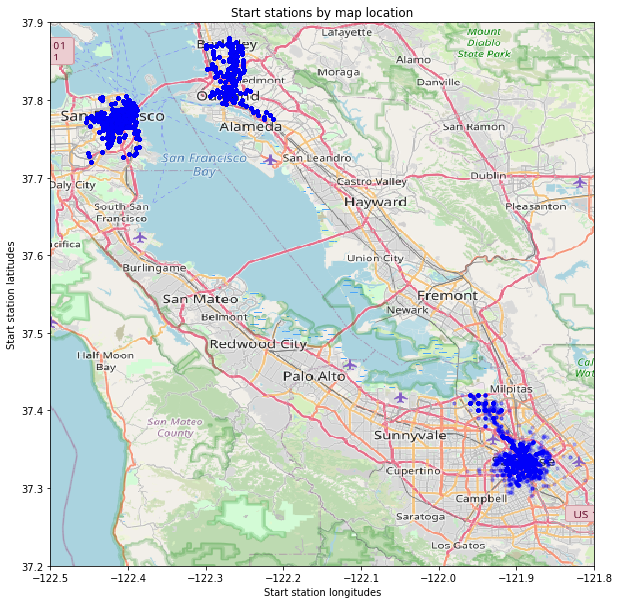

In [32]:
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
map_edges_19 = (-122.5,-121.8,37.2,37.9)
map_image_19 = plt.imread('bay_area_map.png')
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_19_clean.start_station_longitude, df_19_clean.start_station_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_xlim(map_edges_19[0],map_edges_19[1])
ax.set_ylim(map_edges_19[2],map_edges_19[3])
ax.set_title('Start stations by map location')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_19, zorder=0, extent = map_edges_19, aspect= 'equal');

The stations are centered around 3 main hubs - the San Francisco area, the San Jose area, and the East Bay area. I am going to assume, that the spatial distribution of the end stations looks similar. Therefore, I am going to use the spatial data to classify every trip with start_city and end_city. 

In [33]:
# categorising by city
df_19_clean["start_city"] = ""
df_19_clean["end_city"] = ""
df_19_clean.loc[df_19_clean['start_station_longitude'] < -122.35, "start_city"] = "San Francisco"
df_19_clean.loc[(df_19_clean['start_station_longitude'] > -122.35) & (df_19_clean['start_station_longitude'] < -122.1 ), "start_city"] = "East Bay"
df_19_clean.loc[df_19_clean['start_station_longitude'] > -122.1 , "start_city"] = "San Jose"
df_19_clean.loc[df_19_clean['end_station_longitude'] < -122.35, "end_city"] = "San Francisco"
df_19_clean.loc[(df_19_clean['end_station_longitude'] > -122.35) & (df_19_clean['end_station_longitude'] < -122.1 ), "end_city"] = "East Bay"
df_19_clean.loc[df_19_clean['end_station_longitude'] > -122.1 , "end_city"] = "San Jose"

# validating creation of new columns
df_19_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244819 entries, 0 to 1244818
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1244819 non-null  int64         
 1   start_time               1244819 non-null  datetime64[ns]
 2   end_time                 1244819 non-null  datetime64[ns]
 3   start_station_id         1244819 non-null  object        
 4   start_station_name       1241914 non-null  object        
 5   start_station_latitude   1244819 non-null  float64       
 6   start_station_longitude  1244819 non-null  float64       
 7   end_station_id           1244819 non-null  object        
 8   end_station_name         1241812 non-null  object        
 9   end_station_latitude     1244819 non-null  float64       
 10  end_station_longitude    1244819 non-null  float64       
 11  bike_id                  1244819 non-null  int64         
 12  

In [34]:
# assessing first five rows of cleaned dataset
df_19_clean.head()

duration_sec              start_time                end_time  \
0         80825 2019-01-31 17:57:44.613 2019-02-01 16:24:49.864   
1         65900 2019-01-31 20:58:33.886 2019-02-01 15:16:54.173   
2         62633 2019-01-31 18:06:52.924 2019-02-01 11:30:46.530   
3         44680 2019-01-31 19:46:09.719 2019-02-01 08:10:50.318   
4         60709 2019-01-31 14:19:01.541 2019-02-01 07:10:51.065   

  start_station_id           start_station_name  start_station_latitude  \
0              229    Foothill Blvd at 42nd Ave               37.775745   
1                4  Cyril Magnin St at Ellis St               37.785881   
2              245       Downtown Berkeley BART               37.870139   
3               85      Church St at Duboce Ave               37.770083   
4               16      Steuart St at Market St               37.794130   

   start_station_longitude end_station_id              end_station_name  \
0              -122.213037            196       Grand Ave at Perkins St   
1              -122.408915            134        Valencia St at 24th St   
2              -122.268422            157          65th St at Hollis St   
3              -122.429156             53        Grove St at Divisadero   
4              -122.394430             28  The Embarcadero at Bryant St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0             37.808894            -122.256460     4861  Subscriber   
1             37.752428            -122.420628     5506  Subscriber   
2             37.846784            -122.291376     2717    Customer   
3             37.775946            -122.437777     4557    Customer   
4             37.787168            -122.388098     2100    Customer   

  bike_share_for_all_trip rental_access_method  week_day month  hour  \
0                      No                  NaN  Thursday   Jan    17   
1                      No                  NaN  Thursday   Jan    20   
2                      No                  NaN  Thursday   Jan    18   
3                      No                  NaN  Thursday   Jan    19   
4                      No                  NaN  Thursday   Jan    14   

      start_city       end_city  
0       East Bay       East Bay  
1  San Francisco  San Francisco  
2       East Bay       East Bay  
3  San Francisco  San Francisco  
4  San Francisco  San Francisco

In [35]:
# storing cleaned data in a csv
df_19_clean.to_csv('bike-share-data-2019-clean.csv', index=False, encoding = 'utf-8')

<a id='clean20'></a>
### 2020

Next, I am addressing the data quality and tidiness issues in the 2020 dataset. 

In [36]:
# Creating a copy of the original 2020 dataframe
df_20_clean = df_20.copy()

Converting start_time and end_time to datetime series, extracting weekday, month, and hour of the day:

In [37]:
df_20_clean.start_time = pd.to_datetime(df_20_clean.start_time)
df_20_clean.end_time = pd.to_datetime(df_20_clean.end_time)

df_20_clean['week_day'] = df_20_clean.start_time.dt.day_name()
df_20_clean['month'] = df_20_clean.start_time.dt.strftime("%b")
df_20_clean['hour'] = df_20_clean.start_time.dt.hour

Converting start and end station ids and bike ids to string, then removing decimal digits:

In [38]:
df_20_clean.start_station_id = df_20_clean.start_station_id.astype(str)
df_20_clean.end_station_id = df_20_clean.end_station_id.astype(str)
df_20_clean.bike_id = df_20_clean.bike_id.astype(str)
df_20_clean.start_station_id = df_20_clean.start_station_id.apply(lambda x : x.split('.')[0])
df_20_clean.end_station_id = df_20_clean.end_station_id.apply(lambda x : x.split('.')[0])
df_20_clean.bike_id = df_20_clean.bike_id.apply(lambda x : x.split('.')[0])

Converting user_type, member_casual, rental_access_method, rideable_type and is_equity to categorical types:

In [39]:
df_20_clean.user_type = df_20_clean.user_type.astype('category')
df_20_clean.member_casual = df_20_clean.member_casual.astype('category')
df_20_clean.rental_access_method = df_20_clean.rental_access_method.astype('category')
df_20_clean.rideable_type = df_20_clean.rideable_type.astype('category')
df_20_clean.is_equity = df_20_clean.is_equity.astype('category')
df_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285685 entries, 0 to 1285684
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             905007 non-null   float64       
 1   start_time               905007 non-null   datetime64[ns]
 2   end_time                 905007 non-null   datetime64[ns]
 3   start_station_id         1285685 non-null  object        
 4   start_station_name       659907 non-null   object        
 5   start_station_latitude   905007 non-null   float64       
 6   start_station_longitude  905007 non-null   float64       
 7   end_station_id           1285685 non-null  object        
 8   end_station_name         654287 non-null   object        
 9   end_station_latitude     905007 non-null   float64       
 10  end_station_longitude    905007 non-null   float64       
 11  bike_id                  1285685 non-null  object        
 12  

Assessing and cleaning 0 values in latitude and longitude data:

In [40]:
# displaying station_ids for stations with latitude or longitude 0
display(df_20_clean.query('start_station_latitude == 0 or start_station_longitude == 0').start_station_id.unique())
display(df_20_clean.query('end_station_latitude == 0 or end_station_longitude == 0').end_station_id.unique())

array(['449'], dtype=object)

array(['449'], dtype=object)

In [41]:
# further assessing station 449
display(df_20_clean.query("start_station_id == '449'"), df_19_clean.query("end_station_id == '449'"))

duration_sec          start_time            end_time start_station_id  \
110108         794.0 2020-01-28 20:50:28 2020-01-28 21:03:43              449   
110109         734.0 2020-01-22 20:49:20 2020-01-22 21:01:34              449   
110110         819.0 2020-01-29 20:47:29 2020-01-29 21:01:09              449   
110111         788.0 2020-01-23 20:48:55 2020-01-23 21:02:04              449   
110112         943.0 2020-01-31 18:05:13 2020-01-31 18:20:56              449   
110113        1098.0 2020-01-24 20:25:24 2020-01-24 20:43:42              449   
110114         130.0 2020-01-21 20:39:57 2020-01-21 20:42:08              449   
110115        1081.0 2020-01-27 20:21:14 2020-01-27 20:39:15              449   
410365         816.0 2020-02-19 21:16:22 2020-02-19 21:29:58              449   
410366         801.0 2020-02-04 20:45:51 2020-02-04 20:59:13              449   
410367         124.0 2020-02-03 20:24:50 2020-02-03 20:26:54              449   
410368         865.0 2020-02-11 20:47:16 2020-02-11 21:01:42              449   
410369         827.0 2020-02-10 21:32:47 2020-02-10 21:46:34              449   
410370        1031.0 2020-02-07 18:38:47 2020-02-07 18:55:58              449   
410371         970.0 2020-02-12 20:31:23 2020-02-12 20:47:34              449   
410372         759.0 2020-02-20 20:26:43 2020-02-20 20:39:23              449   
410373         782.0 2020-02-05 20:23:43 2020-02-05 20:36:45              449   
410374         543.0 2020-02-12 20:39:58 2020-02-12 20:49:01              449   
410375         170.0 2020-02-19 21:11:19 2020-02-19 21:14:09              449   
410376         748.0 2020-02-11 20:46:44 2020-02-11 20:59:12              449   
410377         762.0 2020-02-18 20:37:41 2020-02-18 20:50:23              449   
410378         913.0 2020-02-21 20:31:05 2020-02-21 20:46:19              449   
410379         777.0 2020-02-06 20:19:51 2020-02-06 20:32:49              449   
790738        1067.0 2020-03-02 20:19:11 2020-03-02 20:36:58              449   
957678           NaN                 NaT                 NaT              449   

                   start_station_name  start_station_latitude  \
110108  16th Depot Bike Fleet Station                     0.0   
110109  16th Depot Bike Fleet Station                     0.0   
110110  16th Depot Bike Fleet Station                     0.0   
110111  16th Depot Bike Fleet Station                     0.0   
110112  16th Depot Bike Fleet Station                     0.0   
110113  16th Depot Bike Fleet Station                     0.0   
110114  16th Depot Bike Fleet Station                     0.0   
110115  16th Depot Bike Fleet Station                     0.0   
410365  16th Depot Bike Fleet Station                     0.0   
410366  16th Depot Bike Fleet Station                     0.0   
410367  16th Depot Bike Fleet Station                     0.0   
410368  16th Depot Bike Fleet Station                     0.0   
410369  16th Depot Bike Fleet Station                     0.0   
410370  16th Depot Bike Fleet Station                     0.0   
410371  16th Depot Bike Fleet Station                     0.0   
410372  16th Depot Bike Fleet Station                     0.0   
410373  16th Depot Bike Fleet Station                     0.0   
410374  16th Depot Bike Fleet Station                     0.0   
410375  16th Depot Bike Fleet Station                     0.0   
410376  16th Depot Bike Fleet Station                     0.0   
410377  16th Depot Bike Fleet Station                     0.0   
410378  16th Depot Bike Fleet Station                     0.0   
410379  16th Depot Bike Fleet Station                     0.0   
790738  16th Depot Bike Fleet Station                     0.0   
957678  16th Depot Bike Fleet Station                     NaN   

        start_station_longitude end_station_id               end_station_name  \
110108                      0.0            nan                            NaN   
110109                      0.0            nan  

Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method, week_day, month, hour, start_city, end_city]
Index: []

Station 449 seems to be the bike depot. As the end station is null in most rows, station 449 seems to have a similar purpose as the test station 420 in 2019. I am going to drop it from the dataset. 

In [42]:
# dropping staton 449
df_20_clean = df_20_clean.query("start_station_id != '449' and end_station_id != '449'")
df_20_clean.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  904946.000000           904946.000000            904946.000000   
mean      805.860896               37.748956              -122.360106   
std      1636.249962                0.121515                 0.142762   
min        60.000000               37.253050              -122.514230   
25%       370.000000               37.765282              -122.420664   
50%       594.000000               37.776973              -122.404635   
75%       932.000000               37.789915              -122.392741   
max    811077.000000               37.880222              -121.807049   

       end_station_latitude  end_station_longitude      start_lat  \
count         904946.000000          904946.000000  380672.000000   
mean              37.749048            -122.359744      37.722348   
std                0.121492               0.142487       0.151552   
min               37.240941            -122.575763      37.239200   
25%               37.765470            -122.419957      37.760000   
50%               37.777064            -122.403681      37.773506   
75%               37.790230            -122.392741      37.787500   
max               37.995942            -121.772722      37.880222   

           start_lng        end_lat        end_lng           hour  
count  380672.000000  380030.000000  380030.000000  904946.000000  
mean     -122.342256      37.722295    -122.342487      13.643578  
std         0.182446       0.151622       0.182585       4.763831  
min      -122.514300      37.004600    -122.559000       0.000000  
25%      -122.432100      37.760000    -122.431946       9.000000  
50%      -122.411800      37.773500    -122.411800      14.000000  
75%      -122.390200      37.787710    -122.390288      17.000000  
max      -121.770000      37.962100    -121.560600      23.000000

Dealing with the renamed columns from April onwards:

In [43]:
# filling the columns from before April with the values from the new columns
df_20_clean.start_station_latitude.fillna(df_20_clean.start_lat, inplace=True)
df_20_clean.start_station_longitude.fillna(df_20_clean.start_lng, inplace=True)
df_20_clean.end_station_latitude.fillna(df_20_clean.end_lat, inplace=True)
df_20_clean.end_station_longitude.fillna(df_20_clean.end_lng, inplace=True)
df_20_clean.start_time.fillna(df_20_clean.started_at, inplace=True)
df_20_clean.end_time.fillna(df_20_clean.ended_at, inplace=True)

# dropping the renamed columns
df_20_clean.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng', 'started_at', 'ended_at'], inplace=True)
df_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285618 entries, 0 to 1285684
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   duration_sec             904946 non-null   float64 
 1   start_time               1285618 non-null  object  
 2   end_time                 1285618 non-null  object  
 3   start_station_id         1285618 non-null  object  
 4   start_station_name       659849 non-null   object  
 5   start_station_latitude   1285618 non-null  float64 
 6   start_station_longitude  1285618 non-null  float64 
 7   end_station_id           1285618 non-null  object  
 8   end_station_name         654244 non-null   object  
 9   end_station_latitude     1284976 non-null  float64 
 10  end_station_longitude    1284976 non-null  float64 
 11  bike_id                  1285618 non-null  object  
 12  user_type                904946 non-null   category
 13  rental_access_method     61

Fixing the changed user type mapping (user_type is changed to member_casual, with casual corresponding to customer, and member corresponding to subscriber)

In [44]:
# filling member_casual column with corresponding terminolgoy from user_typer column
df_20_clean['member_casual'] = df_20_clean['member_casual'].map({'member': 'Subscriber', 'casual': 'Customer'})

df_20_clean.member_casual.value_counts()

Customer      226098
Subscriber    154574
Name: member_casual, dtype: int64

In [45]:
# filling the columns from before April with the values from the new columns
df_20_clean.user_type.fillna(df_20_clean.member_casual, inplace=True)

# dropping member_casual
df_20_clean.drop(columns=['member_casual'], inplace=True)
df_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285618 entries, 0 to 1285684
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   duration_sec             904946 non-null   float64 
 1   start_time               1285618 non-null  object  
 2   end_time                 1285618 non-null  object  
 3   start_station_id         1285618 non-null  object  
 4   start_station_name       659849 non-null   object  
 5   start_station_latitude   1285618 non-null  float64 
 6   start_station_longitude  1285618 non-null  float64 
 7   end_station_id           1285618 non-null  object  
 8   end_station_name         654244 non-null   object  
 9   end_station_latitude     1284976 non-null  float64 
 10  end_station_longitude    1284976 non-null  float64 
 11  bike_id                  1285618 non-null  object  
 12  user_type                1285618 non-null  category
 13  rental_access_method     61

Converting start_time and end_time to datetime series, extracting weekday, month, and hour of the day:

In [46]:
df_20_clean.start_time = pd.to_datetime(df_20_clean.start_time)
df_20_clean.end_time = pd.to_datetime(df_20_clean.end_time)

df_20_clean['week_day'] = df_20_clean.start_time.dt.day_name()
df_20_clean['month'] = df_20_clean.start_time.dt.strftime("%b")
df_20_clean['hour'] = df_20_clean.start_time.dt.hour

Recalculating duration_sec:

In [47]:
df_20_clean.loc[:,['duration_sec']] = (df_20_clean['end_time'] - df_20_clean['start_time']).dt.seconds

# checking summary statistics once again
df_20_clean.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  1.285618e+06            1.285618e+06             1.285618e+06   
mean   9.734391e+02            3.774108e+01            -1.223548e+02   
std    2.205182e+03            1.316892e-01             1.557841e-01   
min    0.000000e+00            3.723920e+01            -1.225143e+02   
25%    3.840000e+02            3.776409e+01            -1.224225e+02   
50%    6.390000e+02            3.777660e+01            -1.224064e+02   
75%    1.056000e+03            3.778968e+01            -1.223919e+02   
max    8.639900e+04            3.788022e+01            -1.217700e+02   

       end_station_latitude  end_station_longitude          hour  
count          1.284976e+06           1.284976e+06  1.285618e+06  
mean           3.774114e+01          -1.223546e+02  1.385888e+01  
std            1.316928e-01           1.556267e-01  4.656833e+00  
min            3.700460e+01          -1.225758e+02  0.000000e+00  
25%            3.776417e+01          -1.224219e+02  1.000000e+01  
50%            3.777660e+01          -1.224057e+02  1.500000e+01  
75%            3.778976e+01          -1.223920e+02  1.700000e+01  
max            3.799594e+01          -1.215606e+02  2.300000e+01

In [48]:
# resetting the index, checking datatype and non-null value information again
df_20_clean = df_20_clean.reset_index(drop=True)
df_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285618 entries, 0 to 1285617
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1285618 non-null  int64         
 1   start_time               1285618 non-null  datetime64[ns]
 2   end_time                 1285618 non-null  datetime64[ns]
 3   start_station_id         1285618 non-null  object        
 4   start_station_name       659849 non-null   object        
 5   start_station_latitude   1285618 non-null  float64       
 6   start_station_longitude  1285618 non-null  float64       
 7   end_station_id           1285618 non-null  object        
 8   end_station_name         654244 non-null   object        
 9   end_station_latitude     1284976 non-null  float64       
 10  end_station_longitude    1284976 non-null  float64       
 11  bike_id                  1285618 non-null  object        
 12  

Data tidiness: Categorising stations into cities

For data to be tidy, each row has a single observation and each column reports a single variable. Currently, the spatial data "hides" another variable - city. I expect, that the map of stations fro 2020 is going to look similar as the one for 2019. Nevertheless, I will visualize the spatial data before categorising each station into a city. 

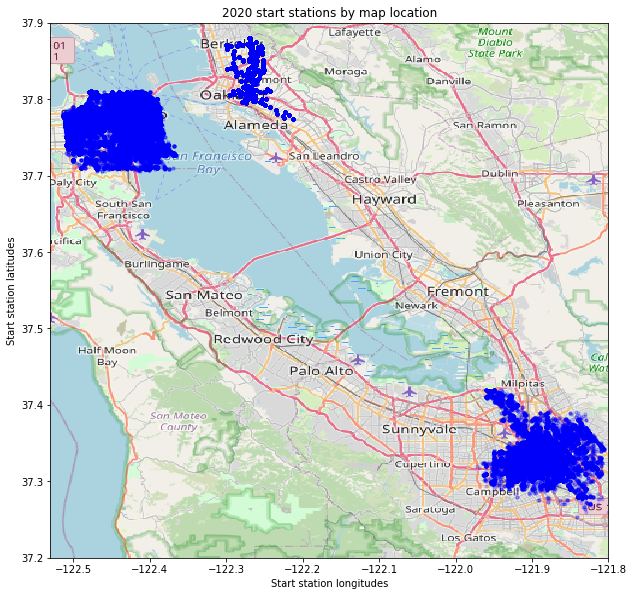

In [49]:
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
map_edges_20 = (-122.53,-121.8,37.2,37.9)
map_image_20 = plt.imread('bay_area_map.png')
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_20_clean.start_station_longitude, df_20_clean.start_station_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_xlim(map_edges_20[0],map_edges_20[1])
ax.set_ylim(map_edges_20[2],map_edges_20[3])
ax.set_title('2020 start stations by map location')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_20, zorder=0, extent = map_edges_20, aspect= 'equal');

This visualization shows a lot more stations than the 2019 one, especially the San Francisco area seems very crowded. I am going to assess this further in the Data Visualization part. 
The stations are centered around 3 main hubs - the San Francisco area, the San Jose area, and the East Bay area. I am going to assume, that the spatial distribution of the end stations looks similar. Therefore, I am going to use the spatial data to classify every trip with start_city and end_city. 

In [50]:
# categorising stations into cities
df_20_clean["start_city"] = ""
df_20_clean["end_city"] = ""
df_20_clean.loc[df_20_clean['start_station_longitude'] < -122.35, "start_city"] = "San Francisco"
df_20_clean.loc[(df_20_clean['start_station_longitude'] > -122.35) & (df_20_clean['start_station_longitude'] < -122.1 ), "start_city"] = "East Bay"
df_20_clean.loc[df_20_clean['start_station_longitude'] > -122.1 , "start_city"] = "San Jose"
df_20_clean.loc[df_20_clean['end_station_longitude'] < -122.35, "end_city"] = "San Francisco"
df_20_clean.loc[(df_20_clean['end_station_longitude'] > -122.35) & (df_20_clean['end_station_longitude'] < -122.1 ), "end_city"] = "East Bay"
df_20_clean.loc[df_20_clean['end_station_longitude'] > -122.1 , "end_city"] = "San Jose"

# evaluating column information again
df_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285618 entries, 0 to 1285617
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1285618 non-null  int64         
 1   start_time               1285618 non-null  datetime64[ns]
 2   end_time                 1285618 non-null  datetime64[ns]
 3   start_station_id         1285618 non-null  object        
 4   start_station_name       659849 non-null   object        
 5   start_station_latitude   1285618 non-null  float64       
 6   start_station_longitude  1285618 non-null  float64       
 7   end_station_id           1285618 non-null  object        
 8   end_station_name         654244 non-null   object        
 9   end_station_latitude     1284976 non-null  float64       
 10  end_station_longitude    1284976 non-null  float64       
 11  bike_id                  1285618 non-null  object        
 12  

The dataset still has some missing values, e.g. missing ids, station names, rental access methods, ride ids, rideable types, and information in the "is_equity" column. Nevertheless, I am accepting these missing values and end the data wrangling process here. I am not planning to use the rental access method, ride id, rideable type and is_equity in my evaluation, therefore I can safely ignore these missing values. As for the missing station ids and station names: The number of affected columns is too big to justify dropping null values, and I cannot imputate them in an efficient way. 

In [51]:
# assessing the first 5 rows of the clean dataset
df_20_clean.head()

duration_sec              start_time                end_time  \
0         83118 2020-01-31 15:23:47.733 2020-02-01 14:29:06.263   
1         68239 2020-01-31 15:40:31.616 2020-02-01 10:37:51.000   
2         55407 2020-01-31 17:48:16.635 2020-02-01 09:11:44.317   
3         54929 2020-01-31 17:53:03.413 2020-02-01 09:08:32.634   
4         55700 2020-01-31 17:12:33.460 2020-02-01 08:40:53.646   

  start_station_id             start_station_name  start_station_latitude  \
0              400  Buchanan St at North Point St               37.804272   
1               99           Folsom St at 15th St               37.767037   
2              197    El Embarcadero at Grand Ave               37.808848   
3              197    El Embarcadero at Grand Ave               37.808848   
4               12    Pier 1/2 at The Embarcadero               37.796389   

   start_station_longitude end_station_id               end_station_name  \
0              -122.433537            400  Buchanan St at North Point St   
1              -122.415443             99           Folsom St at 15th St   
2              -122.249680            197    El Embarcadero at Grand Ave   
3              -122.249680            197    El Embarcadero at Grand Ave   
4              -122.394586            371     Lombard St at Columbus Ave   

   end_station_latitude  ...   user_type rental_access_method ride_id  \
0             37.804272  ...    Customer                  NaN     NaN   
1             37.767037  ...  Subscriber                  NaN     NaN   
2             37.808848  ...    Customer                  NaN     NaN   
3             37.808848  ...    Customer                  NaN     NaN   
4             37.802746  ...    Customer                  NaN     NaN   

  rideable_type is_equity week_day month hour     start_city       end_city  
0           NaN       NaN   Friday   Jan   15  San Francisco  San Francisco  
1           NaN       NaN   Friday   Jan   15  San Francisco  San Francisco  
2           NaN       NaN   Friday   Jan   17       East Bay       East Bay  
3           NaN       NaN   Friday   Jan   17       East Bay       East Bay  
4           NaN       NaN   Friday   Jan   17  San Francisco  San Francisco  

[5 rows x 22 columns]

In [52]:
# storing the clean dataframe in a csv
df_20_clean.to_csv('bike-share-data-2020-clean.csv', index=False, encoding = 'utf-8')

### What is the structure of your dataset?

The dataset consists of two dataframes, one containing the bike sharing data from January to June 2019, the other one similar data from January to June 2020. 

Before data wrangling, the 2019 table had 15 variable columns, and 1,244,839 rows with observations. After the preliminary data wrangling, it has 20 variable columns and 1,244,820 rows. The variables are:
1. duration_sec: An integer calculated from the delta of start_time and end_time, indicating the length of the trip
2. Two datetime objects, start_time and end_time, corresponding to when a trip started and ended
3. Five strings detailing the id and name of the start and end station, id of the bike in use, and starting in April, id of the trip. 
4. Four floats representing the latitude and longitudes of start station and end station respectively.
5. Three categorical variables indicating user_type (customer versus subscriber), membership in the bike share for all program (a program with reduced prices for members of a welfare program), and the rental access method (app versus clipper). 
6. Three variables detailing the month (string), weekday (category) and hour (int) of the trip.
7. Two variables detailing the start_city and end_city of the trip as a string. 

Before data wrangling, the 2020 table had 24 variable columns, and 1,285,685 rows with observations. After the preliminary data wrangling , it has 22 variable columns and 1,285,618 rows. The variables are:
1. duration_sec: An integer calculated from the delta of start_time and end_time, indicating the length of the trip
2. Two datetime objects, start_time and end_time, corresponding to when a trip started and ended
3. Five strings detailing the id and name of the start and end station, and id of the bike in use. 
4. Four floats representing the latitude and longitudes of start station and end station respectively.
5. Three categorical variables indicating user_type (customer versus subscriber), rideable type (docked bike versus electric bike), is_equity (True or False), and the rental access method (app versus clipper). 
6. Three variables detailing the month (string), weekday (category) and hour (int) of the trip.
7. Two variables detailing the start_city and end_city of the trip as a string.


### What is/are the main feature(s) of interest in your dataset?

I am mostly interested in trip duration and number of trips, and what variables can be used to predict those. Additionally, I want to see if there are notable differences between the 2019 and the 2020 trip data.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the time-related variables, like month, weekday and hour will have the strongest effect on the trip duration and number of trips. Other interesting features to investigate are the start and end station, user type, and regional differences. 

<a id='uni'></a>
## Univariate Exploration

In [53]:
# reading in the datasets resulting from the wrangling phase
explore_19 = pd.read_csv('bike-share-data-2019-clean.csv', low_memory=False);
explore_20 = pd.read_csv('bike-share-data-2020-clean.csv', low_memory=False);

I'll start by evaluating my main feature of interest, trip duration. 

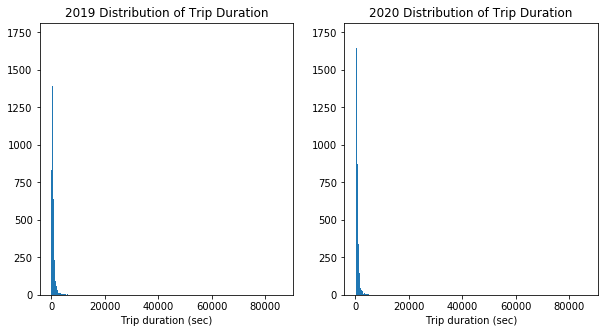

In [54]:
# visualizing trip duration distribution
plt.figure(figsize = [10, 5])
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, explore_19['duration_sec'].max()+1, 1)
plt.hist(data = explore_19, x = 'duration_sec', bins = bin_edges)
plt.title('2019 Distribution of Trip Duration')
plt.xlabel('Trip duration (sec)')
# 2020 distribution
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, explore_20['duration_sec'].max()+1, 1)
plt.hist(data = explore_19, x = 'duration_sec', bins = bin_edges)
plt.title('2020 Distribution of Trip Duration')
plt.xlabel('Trip duration (sec)')
plt.show();

This visualization is very hard to read, it seems there are extreme outliers in the dataset. To get a better sense of the maximum trip duration, I am displaying the longest trip durations for 2019 and 2020 next. 

In [55]:
# displaying max. trip duration for both years
display(explore_19.duration_sec.max())
display(explore_20.duration_sec.max())

86114

86399

The longest trips in 2019 and 2020 lasted around 86000 seconds - what corresponds to about one day. Maybe this accounts for daily passes? It might make sense to transform duration_sec into duration_minutes, to get a better feeling for the trip duration. As the curves are heavily skewed to the right, I will use xlimits to zoom in on the bulk of the durations, and log-transform the x-axis. 

In [56]:
# calculating duration_min from duration seconds
explore_19['duration_min'] = explore_19['duration_sec'] / 60
explore_20['duration_min'] = explore_20['duration_sec'] / 60

# displaying summary statistics for duration_min
display(explore_19.duration_min.describe())
display(explore_20.duration_min.describe())

count    1.244819e+06
mean     1.315028e+01
std      3.164778e+01
min      1.000000e+00
25%      5.750000e+00
50%      9.166667e+00
75%      1.433333e+01
max      1.435233e+03
Name: duration_min, dtype: float64

count    1.285618e+06
mean     1.622398e+01
std      3.675304e+01
min      0.000000e+00
25%      6.400000e+00
50%      1.065000e+01
75%      1.760000e+01
max      1.439983e+03
Name: duration_min, dtype: float64

In 2019, the mean trip duration is around 13 minutes, in 2020 around 16 minutes. In 2020 the trip duration's standard deviation is higher than in 2019. 

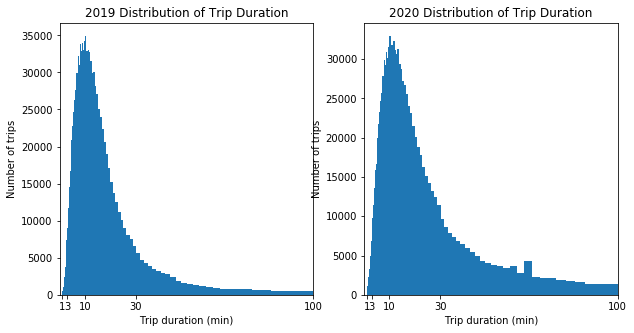

In [57]:
# log scale
log_binsize = 0.02
bins_19 = 10 ** np.arange(0, np.log10(explore_19['duration_min'].max())+log_binsize, log_binsize)
bins_20 = 10 ** np.arange(0, np.log10(explore_20['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize = [10, 5]) 
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
ticks =  [1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = explore_19, x = 'duration_min', bins = bins_19)
plt.xticks(ticks, labels)
plt.xlabel('Trip duration (min)')
plt.ylabel('Number of trips')
plt.title('2019 Distribution of Trip Duration')
plt.xlim(0,100)
# 2020 distribution
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
ticks = [1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = explore_20, x = 'duration_min', bins = bins_20)
plt.xlabel('Trip duration (min)')
plt.ylabel('Number of trips')
plt.xticks(ticks, labels)
plt.title('2020 Distribution of Trip Duration')
plt.xlim(0,100)
plt.show();

It has been a challenge to sufficiently zoom in and transform to be able to make conclusions about the distributions. It seems, that in both years, there is a peak in trip duration at around ten minutes. The vast majority of the trips is shorter than 20 minutes. In 2020, the number of trips with a duration over 20 minutes is higher than in 2019. The small second peak in the 2020 dataset could hint at the availability of hourly passes. 

Next up, I am investigating the distribution of the other time-related variables: month, weekday, and hour. 

In [58]:
# transforming month, week_day and while I am already at it user_type and start city to ordered categorical variables. 
# this will ensure, that they are ordered in the same sequence in the visualizations for both years
ordinal_var_dict = {'week_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
                    'user_type': ['Subscriber', 'Customer'],
                    'start_city': ['San Francisco', 'San Jose', 'East Bay']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    explore_19[var] = explore_19[var].astype(ordered_var)
    explore_20[var] = explore_20[var].astype(ordered_var)

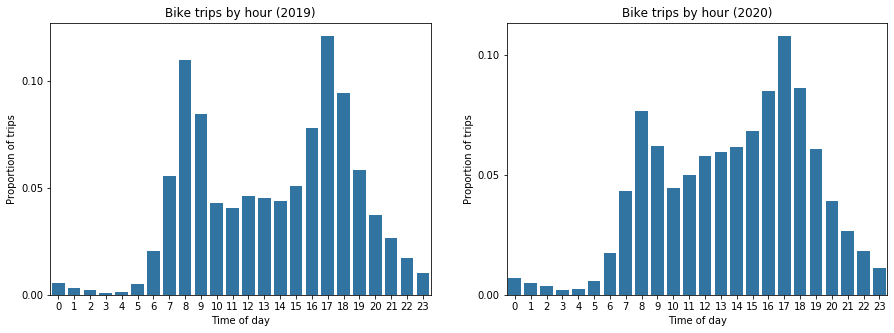

In [59]:
# plotting trips by hour as proportions 
n_points_19 = explore_19.shape[0]
max_count_19 = explore_19['hour'].value_counts().max()
max_prop_19 = max_count_19 / n_points_19
# generate tick mark locations and names
tick_props_19 = np.arange(0, max_prop_19, 0.05)
tick_names_19 = ['{:0.2f}'.format(v) for v in tick_props_19]

n_points_20 = explore_20.shape[0]
max_count_20 = explore_20['hour'].value_counts().max()
max_prop_20 = max_count_20 / n_points_20
# generate tick mark locations and names
tick_props_20 = np.arange(0, max_prop_20, 0.05)
tick_names_20 = ['{:0.2f}'.format(v) for v in tick_props_20]

plt.figure(figsize = [15, 5]) # larger figure size for subplots
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'hour', color = base_color)
plt.yticks(tick_props_19 * n_points_19, tick_names_19)
plt.xlabel('Time of day')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by hour (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_20, x = 'hour', color = base_color)
plt.yticks(tick_props_20 * n_points_20, tick_names_20)
plt.xlabel('Time of day')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by hour (2020)');

There are clear differences to observe between the two datasets. In 2019, there is a bimodal distribution, with peaks at 8 am and 5pm - an indication that the bikes are used to commute to and from work. While these peaks are also present in the 2020 dataset, the bimodal distribution is less pronounced. The 2020 distribution is skewed to the left, with more bike trips taking place in the afternoon and evening than in the morning. I assume that this changes are related to less people commuting to work, and more recreational bike trips than in 2019.

Let's have a look if the differences are as visible when visualizing the number of trips by weekday. 

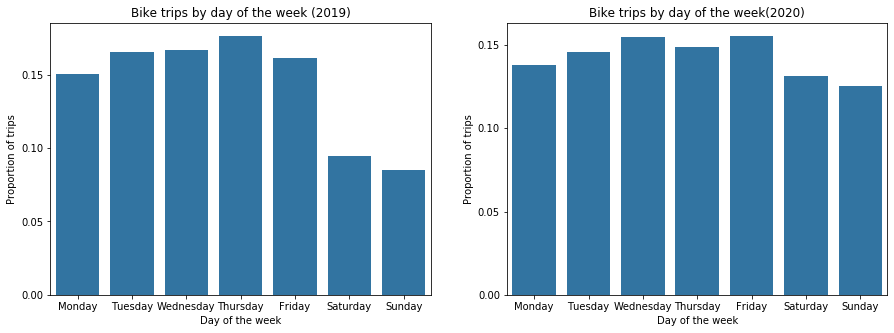

In [60]:
# again plotting proportions rather than absolute numbers
n_points_19 = explore_19.shape[0]
max_count_19 = explore_19['week_day'].value_counts().max()
max_prop_19 = max_count_19 / n_points_19
# generate tick mark locations and names
tick_props_19 = np.arange(0, max_prop_19, 0.05)
tick_names_19 = ['{:0.2f}'.format(v) for v in tick_props_19]

n_points_20 = explore_20.shape[0]
max_count_20 = explore_20['week_day'].value_counts().max()
max_prop_20 = max_count_20 / n_points_20
# generate tick mark locations and names
tick_props_20 = np.arange(0, max_prop_20, 0.05)
tick_names_20 = ['{:0.2f}'.format(v) for v in tick_props_20]

plt.figure(figsize = [15, 5]) # larger figure size for subplots
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'week_day', color = base_color)
plt.yticks(tick_props_19 * n_points_19, tick_names_19)
plt.ylabel('Proportion of trips')
plt.xlabel('Day of the week')
plt.title('Bike trips by day of the week (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_20, x = 'week_day', color = base_color)
plt.yticks(tick_props_20 * n_points_20, tick_names_20)
plt.ylabel('Proportion of trips')
plt.xlabel('Day of the week')
plt.title('Bike trips by day of the week(2020)');

As expected, the distribution of bike trips by day of the week changed from 2019 to 2020. In 2019, there is a clear distinction between Monday to Friday and the weekend. In 2020, this difference is a lot less pronounced, and the bike trips are more equally distributed between the days of the week. In 2019, the highest proportion of bike trips happens on Wednesdays. In 2020, the proportion of bike trips is highest on Wednesdays and Fridays. 

When visualizing the monthly distribution, I expect January and February to be similar in both datasets. I expect the first changes to show in February, with a visible difference from March onwards, when the lockdown measures came into place. (https://techcrunch.com/2020/03/16/bay-area-counties-announce-lockdown-through-april-7/). As I want to evaluate both the monthly distribution and possible absolute increases in trips, I will visualize the monthly trips in percentage and in absolute numbers.

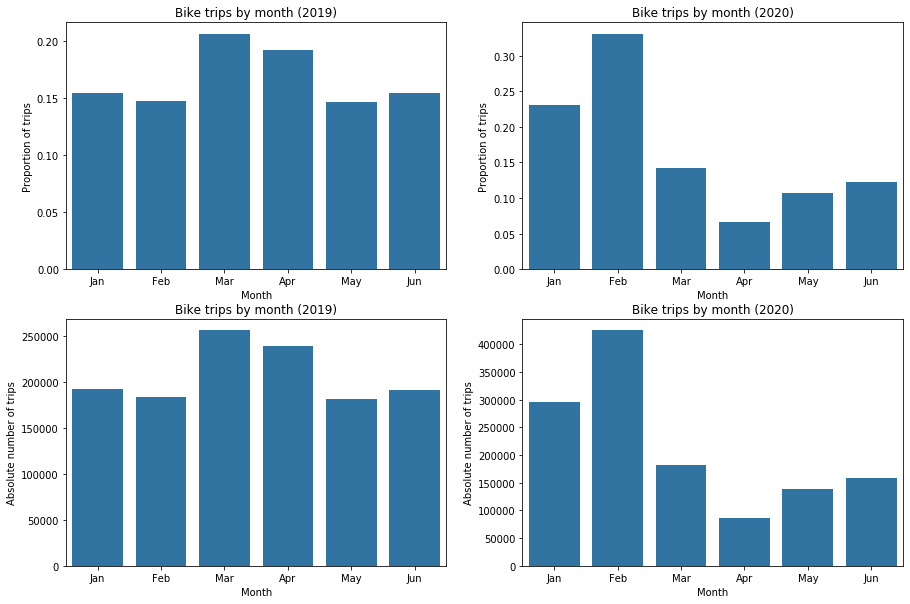

In [61]:
# this time plotting both proportions and absolute numbers
n_points_19 = explore_19.shape[0]
max_count_19 = explore_19['month'].value_counts().max()
max_prop_19 = max_count_19 / n_points_19
# generate tick mark locations and names
tick_props_19 = np.arange(0, max_prop_19, 0.05)
tick_names_19 = ['{:0.2f}'.format(v) for v in tick_props_19]

n_points_20 = explore_20.shape[0]
max_count_20 = explore_20['month'].value_counts().max()
max_prop_20 = max_count_20 / n_points_20
# generate tick mark locations and names
tick_props_20 = np.arange(0, max_prop_20, 0.05)
tick_names_20 = ['{:0.2f}'.format(v) for v in tick_props_20]

plt.figure(figsize = [15, 10]) 
# 2019 distribution
plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'month', color = base_color)
plt.yticks(tick_props_19 * n_points_19, tick_names_19)
plt.xlabel('Month')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by month (2019)')

# 2020 distribution
plt.subplot(2, 2, 2) # 2 rows, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_20, x = 'month', color = base_color)
plt.yticks(tick_props_20 * n_points_20, tick_names_20)
plt.xlabel('Month')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by month (2020)')

# 2019 absolute numbers
plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'month', color = base_color)
plt.xlabel('Month')
plt.ylabel('Absolute number of trips')
plt.title('Bike trips by month (2019)')

# 2020 absolute numbers
plt.subplot(2, 2, 4) # 2 rows, 2 cols, subplot 4
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_20, x = 'month', color = base_color)
plt.xlabel('Month')
plt.ylabel('Absolute number of trips')
plt.title('Bike trips by month (2020)');

When visualizing the bike trips by month, I can make two observations. First, Bay Wheels has certainly expanded from 2019 to 2020, as the number of trips in January and February of 2020 are distinctively higher than in 2019. It is also interesting to see, that contrary to 2019, in 2020 the bike trips increase by around 10% from January to February, instead of decreasing slightly. Especially in 2019, I would have expected a linear increase of trips from January to June, following the change of the seasons. Contrary to this, March and April are the peak months for bike trips. To further explore this, one could compare the monthly distribution to 2018, or evaluate other (possibly external) factors. 

The second observation, is that as expected, the monthly number of bike trips in 2020 shows an abrubt fall from February to March. In April, they fall even more, below the 10.000 trips mark. Only in May, the number of trips starts to recover, still staying on a lower level than in 2019. 

After evaluating the time data, I am going to explore the user_type variable next. Bay Wheels distincts between customers and subscribers. Subscribers (or members) are carrying monthly or annual passes, customers (or casual riders) pay per ride, with the price depending on the ride duration. 

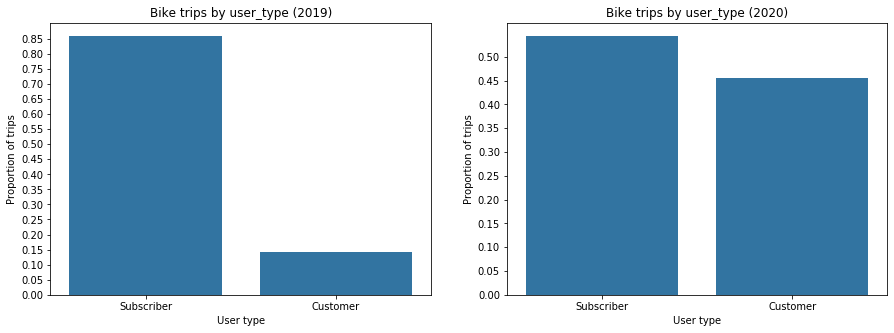

In [62]:
n_points_19 = explore_19.shape[0]
max_count_19 = explore_19['user_type'].value_counts().max()
max_prop_19 = max_count_19 / n_points_19
# generate tick mark locations and names
tick_props_19 = np.arange(0, max_prop_19, 0.05)
tick_names_19 = ['{:0.2f}'.format(v) for v in tick_props_19]

n_points_20 = explore_20.shape[0]
max_count_20 = explore_20['user_type'].value_counts().max()
max_prop_20 = max_count_20 / n_points_20
# generate tick mark locations and names
tick_props_20 = np.arange(0, max_prop_20, 0.05)
tick_names_20 = ['{:0.2f}'.format(v) for v in tick_props_20]

plt.figure(figsize = [15, 5]) 
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'user_type', color = base_color)
plt.yticks(tick_props_19 * n_points_19, tick_names_19)
plt.xlabel('User type')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by user_type (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_20, x = 'user_type', color = base_color)
plt.yticks(tick_props_20 * n_points_20, tick_names_20)
plt.xlabel('User type')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by user_type (2020)');

Again, there are visible differences between the 2019 and the 2020 data. In 2019, 85% of the trips are made by subscribers, only 15% by customers. In 2020, only ca. 55% of the trips are subscriber trips, the remaining ca. 45% are customer trips. This could be explained under the assumption that subscribers primarily use Bay Wheels bikes to commute to work, while customers prefer recreative bike rides. Assuming this, there would be less commuting during the 2020 lockdown, when the Bay Area residents where asked to stay at home and only commute to work if they work in essential jobs. Recreational bike rides could be more prevalent, as people are tired of being stuck indoors, and use bike rides to exercise while staying socially distant.

Next, I am evaluating the distribution of bike rides by city. For simplicity, I am only displaying the start_city variable. 

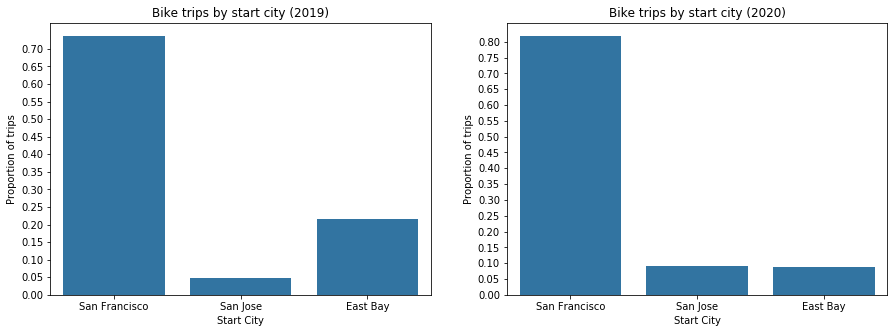

In [63]:
n_points_19 = explore_19.shape[0]
max_count_19 = explore_19['start_city'].value_counts().max()
max_prop_19 = max_count_19 / n_points_19
# generate tick mark locations and names
tick_props_19 = np.arange(0, max_prop_19, 0.05)
tick_names_19 = ['{:0.2f}'.format(v) for v in tick_props_19]

n_points_20 = explore_20.shape[0]
max_count_20 = explore_20['start_city'].value_counts().max()
max_prop_20 = max_count_20 / n_points_20
# generate tick mark locations and names
tick_props_20 = np.arange(0, max_prop_20, 0.05)
tick_names_20 = ['{:0.2f}'.format(v) for v in tick_props_20]

plt.figure(figsize = [15, 5]) 
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'start_city', color = base_color)
plt.yticks(tick_props_19 * n_points_19, tick_names_19)
plt.xlabel('Start City')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by start city (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_20, x = 'start_city', color = base_color)
plt.yticks(tick_props_20 * n_points_20, tick_names_20)
plt.xlabel('Start City')
plt.ylabel('Proportion of trips')
plt.title('Bike trips by start city (2020)');

The majority of the trips starts in San Francisco. In 2020 the percentage of trips starting in San Francisco and San Jose increase slightly from 2019, while bike trips starting from East Bay dropped by more than half.  

Finally, I want to evaluate the stations. Judging from above visualization, I would expect the top frequented stations to be situated in San Francisco. Within the univariate exploration, I will identify the top 10 stations for both years. Later, I will use the spatial data to visualize their location on the map.

In [64]:
# identifying top 10 start and end stations
# https://stackoverflow.com/questions/45615306/get-top-rows-from-column-value-count-with-pandas
top_10_start_19 = explore_19['start_station_name'].value_counts()[:10].sort_values(ascending=False)
trips_top_10_start_19 = pd.DataFrame({'start_station_name':top_10_start_19.index}).merge(explore_19, how='left')

top_10_start_20 = explore_20['start_station_name'].value_counts()[:10].sort_values(ascending=False)
trips_top_10_start_20 = pd.DataFrame({'start_station_name':top_10_start_20.index}).merge(explore_20, how='left')

top_10_end_19 = explore_19['end_station_name'].value_counts()[:10].sort_values(ascending=False)
trips_top_10_end_19 = pd.DataFrame({'end_station_name':top_10_end_19.index}).merge(explore_19, how='left')

top_10_end_20 = explore_20['end_station_name'].value_counts()[:10].sort_values(ascending=False)
trips_top_10_end_20 = pd.DataFrame({'end_station_name':top_10_end_20.index}).merge(explore_20, how='left')

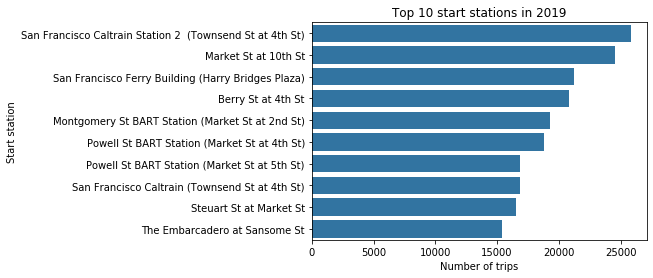

In [65]:
# 2019 start stations
base_color = sb.color_palette()[0]
sb.countplot(data = trips_top_10_start_19, y = 'start_station_name', color = base_color)
plt.xlabel('Number of trips')
plt.ylabel('Start station')
plt.title('Top 10 start stations in 2019');

The top 10 start stations are another sign that Bay Wheels bikes are primarily used for commuting to and from work. Amongst them are several stations along the BART (Bay Area Rapid Transit), the Ferry Building, an agglomeration of office towers (The Embarcadero) and as top station the San Francisco Caltrain Station 2 - a station for a commuter rail line. 

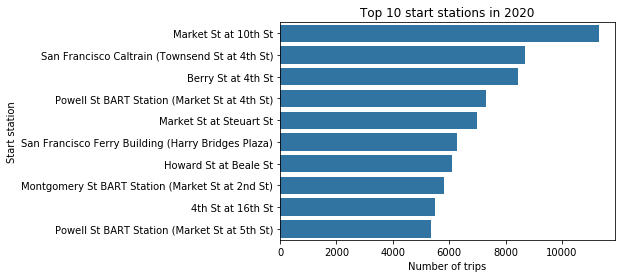

In [66]:
# 2020 start stations
base_color = sb.color_palette()[0]
sb.countplot(data = trips_top_10_start_20, y = 'start_station_name', color = base_color)
plt.xlabel('Number of trips')
plt.ylabel('Start station')
plt.title('Top 10 start stations in 2020');

In 2020, the top 10 start stations look similar, with Caltrain and BART stations hinting at commuter trips. But: The number of trips for the commuter's stations is much lower than in 2019. One example: In 2019, Market St at 10th Street was the start station for ca. 24,000 trips. In 2020, only around 11,000 trips started from here. This hints at the trips being more distributed across stations than in 2019. 

Next, I am evaluating the end stations.

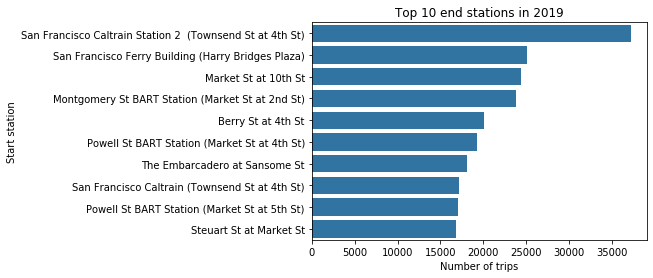

In [67]:
# 2019 end stations
base_color = sb.color_palette()[0]
sb.countplot(data = trips_top_10_end_19, y = 'end_station_name', color = base_color)
plt.xlabel('Number of trips')
plt.ylabel('Start station')
plt.title('Top 10 end stations in 2019');

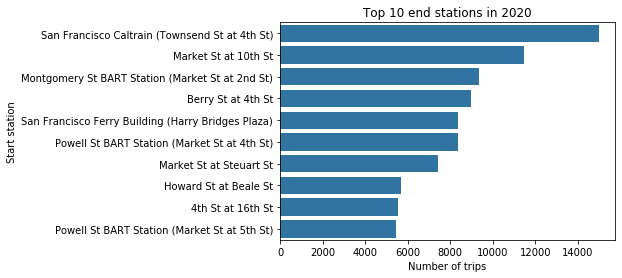

In [68]:
# 2020 end stations
base_color = sb.color_palette()[0]
sb.countplot(data = trips_top_10_end_20, y = 'end_station_name', color = base_color)
plt.xlabel('Number of trips')
plt.ylabel('Start station')
plt.title('Top 10 end stations in 2020');

The end stations show a similar picture as the start stations. Both 2019 and 2020 have commuter-friendly top 10 end stations, but in 2019, the number of trips distributed to these stations is a lot higher than in 2020. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration in seconds is highly skewed to the right, and has extreme outliers. I transformed seconds to minutes, and used a log-transform of the x-axis to see the distribution more clearly. The majority of the trips lasted under 20 minutes, the longest trips lasted around one day. The distribution had a peak at around 10 minutes. As I am looking at two datasets, I looked at two distributions. Both had similar characteristics, but the 2020 distribution showed more trips with a length above 20 minutes than the 2019 distribution. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Additionally, I investigated the time-related features hour, weekday, and month, and the features user_type, city, start_station and end_station. Due to the comparison of 2019 and 2020 datasets, all visualizations have a hidden second variable: year. The features hour, weekday and month were adjusted in the preliminary wrangling part. They were extracted from the start_time feature. Before visualizing the distributions, I transformed weekday, month, user_type, and start_city into ordered categorical variables. I did this, to make sure that their instances will be displayed in the same order in the 2019 and 2020 visualizations. To evaluate the stations, I decided to only visualize the top 10 start and end stations. This decision was based on the sheer number of individual stations in the dataset. A visualization showing the distribution of trips over all stations would not have been legible and therefore not insightful.

As expected, the 2020 distributions did not entirely follow the 2019 distributions. In 2019, hour, weekday and start_station's distributions hint at the bikes being primarily used for commuting. E.g. hour is bimodal with peaks at 8am and 5pm, weekday shows lower trip numbers on weekends than during the week, and the top 10 start and end stations are commuter hubs. In 2020, the bimodal distribution for hour is less distinct, the trips are more spread out over the afternoon and evening. There are only slightly more trips on weekdays than on the weekend, and while the top 10 start and end stations are still commuter hubs, the total number of trips that started and ended there is substantially lower than in 2019. The distribution by month is unusual in both years. In 2019, March and April have the highest number of trips, May and June are as low as January and February. This is counterintuitive, as I would expect the number of trips to rise in summer. In 2020, the distribution by month is obviously impacted by the Covid-19 pandemic, as the number of trips is extremely reduced from March onwards. 

In 2019, the majority of trips can be attributed to Bay Wheels subscribers, in 2020 the distribution between customers and subscribers is almost equal with around 55% and 45%. The majority of trips starts in San Francisco in both years, in 2020 the number of trips starting in East Bay is halfed in comparison to 2019. 

<a id='bi'></a>
## Bivariate Exploration

In this section, I will evaluate the main variable of interest, the trip duration, further, by exploring its relation to the features introduced in the previous section. Again, I am comparing the 2019 and 2020 dataset. 

In a first step, I am relating trip duration to the time variables, starting with month. 

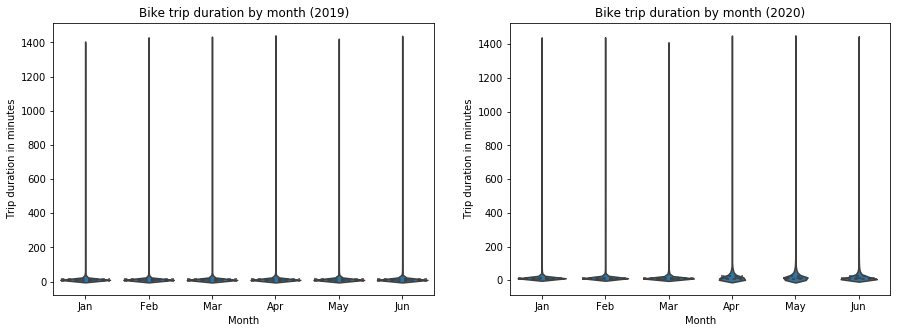

In [69]:
# plotting disitribution of bike trip durations by month
plt.figure(figsize = [15, 5]) 
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = explore_19, x = 'month', y = 'duration_min', color = base_color,
              inner = 'quartile')
plt.title('Bike trip duration by month (2019)')
plt.xlabel('Month')
plt.ylabel('Trip duration in minutes')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = explore_20, x = 'month', y = 'duration_min', color = base_color,
              inner = 'quartile')
plt.title('Bike trip duration by month (2020)')
plt.xlabel('Month')
plt.ylabel('Trip duration in minutes');

Without transforming the y-axis, it is almost impossible to come to any conclusions. Due to the huge amount of outliers, and the fact that the majority of the trips is shorter than 20 minutes, I am deciding to only evaluate a snapshot of the data. I am going to plot the duration minutes by month again, this time only evaluating trips with a length under 60 minutes. 

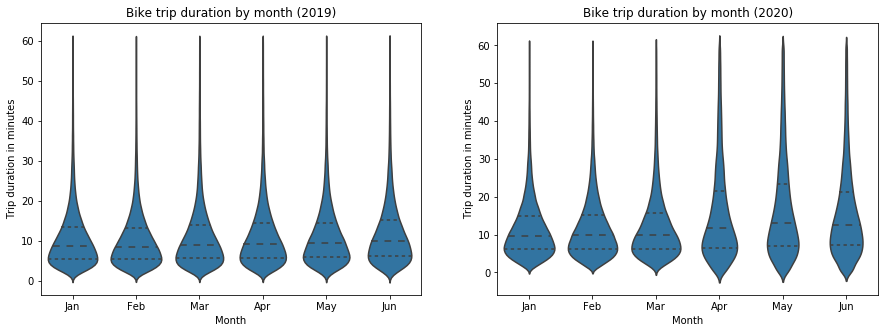

In [70]:
# creating duration snapshots
duration_snapshot_19 = explore_19.query('duration_min < 60')
duration_snapshot_20 = explore_20.query('duration_min < 60')

# plotting bike trip duration by month 
plt.figure(figsize = [15, 5])
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = duration_snapshot_19, x = 'month', y = 'duration_min', color = base_color,
              inner = 'quartile')
plt.title('Bike trip duration by month (2019)')
plt.xlabel('Month')
plt.ylabel('Trip duration in minutes')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = duration_snapshot_20, x = 'month', y = 'duration_min', color = base_color,
              inner = 'quartile')
plt.title('Bike trip duration by month (2020)')
plt.xlabel('Month')
plt.ylabel('Trip duration in minutes');

In 2019, the distribution of bike trip duration is skewed to the right for all months. The median for all months is around 10 minutes, with a very slight increase in trip median month over month. In 2020, January to March are similar to 2019. In April, the distributions change. While still being skewed to the right, the distributions become flatter and longer trip durations become more prelevant. The median trip duration is now closer to 15 than 10 minutes, and the third quartile changes from at ca. 15 minutes to at over 20 minutes, in May  even around 25 minutes. Again, the visualization hints at a rise in longer, recreational bike trips as opposed to short commuter trips. 

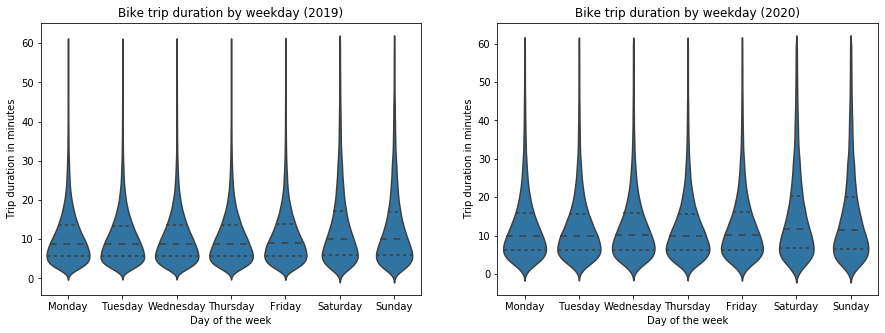

In [71]:
# plotting bike trip duration by day of the week 
plt.figure(figsize = [15, 5])
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = duration_snapshot_19, x = 'week_day', y = 'duration_min', color = base_color,
              inner = 'quartile')
plt.title('Bike trip duration by weekday (2019)')
plt.xlabel('Day of the week')
plt.ylabel('Trip duration in minutes')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = duration_snapshot_20, x = 'week_day', y = 'duration_min', color = base_color,
              inner = 'quartile')
plt.title('Bike trip duration by weekday (2020)')
plt.xlabel('Day of the week')
plt.ylabel('Trip duration in minutes');

In 2019, trips are longer on weekends than during the week. The median trip length is only slightly above the week day median, but the third quartile is at ca. 5 minutes longer and the distribution above the third quartile thins out later than during the week. In 2020, the trip durations look very similar. The median trip length during the week is at ca. 10 minutes, slightly above the 2019 median. The difference in trip length disitrubition is most obvious at and beyond the third quartile. During the week, the 25% longest trips are now longer than around 17 minutes, on weekends longer than 20 minutes. Trip lengths over 30 minutes are more common than in 2019, both during the week and on the weekend. Again, the proportion of longer trips is higher on the weekend than during the week.

To simplify the visualization of trip duration, I am going to create an additional column with a categorical representation of trip duration. 

In [72]:
#creating categories for duration_min
explore_19['trip_duration'] = ''
explore_19.loc[explore_19['duration_min'] < 5, 'trip_duration'] = '<5 minutes'
explore_19.loc[(explore_19['duration_min'] >= 5) & (explore_19['duration_min'] < 10 ), 'trip_duration'] = '5-9 minutes'
explore_19.loc[(explore_19['duration_min'] >= 10) & (explore_19['duration_min'] < 20 ), 'trip_duration'] = '10-19 minutes'
explore_19.loc[(explore_19['duration_min'] >= 20) & (explore_19['duration_min'] < 30 ), 'trip_duration'] = '20-29 minutes'
explore_19.loc[(explore_19['duration_min'] >= 30) & (explore_19['duration_min'] < 60 ), 'trip_duration'] = '30-59 minutes'
explore_19.loc[explore_19['duration_min'] >= 60 , "trip_duration"] = '> 1 hour'

explore_20['trip_duration'] = ''
explore_20.loc[explore_20['duration_min'] < 5, 'trip_duration'] = '<5 minutes'
explore_20.loc[(explore_20['duration_min'] >= 5) & (explore_20['duration_min'] < 10 ), 'trip_duration'] = '5-9 minutes'
explore_20.loc[(explore_20['duration_min'] >= 10) & (explore_20['duration_min'] < 20 ), 'trip_duration'] = '10-19 minutes'
explore_20.loc[(explore_20['duration_min'] >= 20) & (explore_20['duration_min'] < 30 ), 'trip_duration'] = '20-29 minutes'
explore_20.loc[(explore_20['duration_min'] >= 30) & (explore_20['duration_min'] < 60 ), 'trip_duration'] = '30-59 minutes'
explore_20.loc[explore_20['duration_min'] >= 60 , 'trip_duration'] = '> 1 hour'

ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ['<5 minutes','5-9 minutes', '10-19 minutes','20-29 minutes','30-59 minutes','> 1 hour'])
explore_19['trip_duration'] = explore_19['trip_duration'].astype(ordered_var)
explore_20['trip_duration'] = explore_20['trip_duration'].astype(ordered_var)

Now, I am going to use this new column to visualize the trip duration distribution by month and weekday once again, this time using seaborn's countplot function. I chose to do this, to display the numeric amount of trip durations by category, information that is not available in the violin plots. 

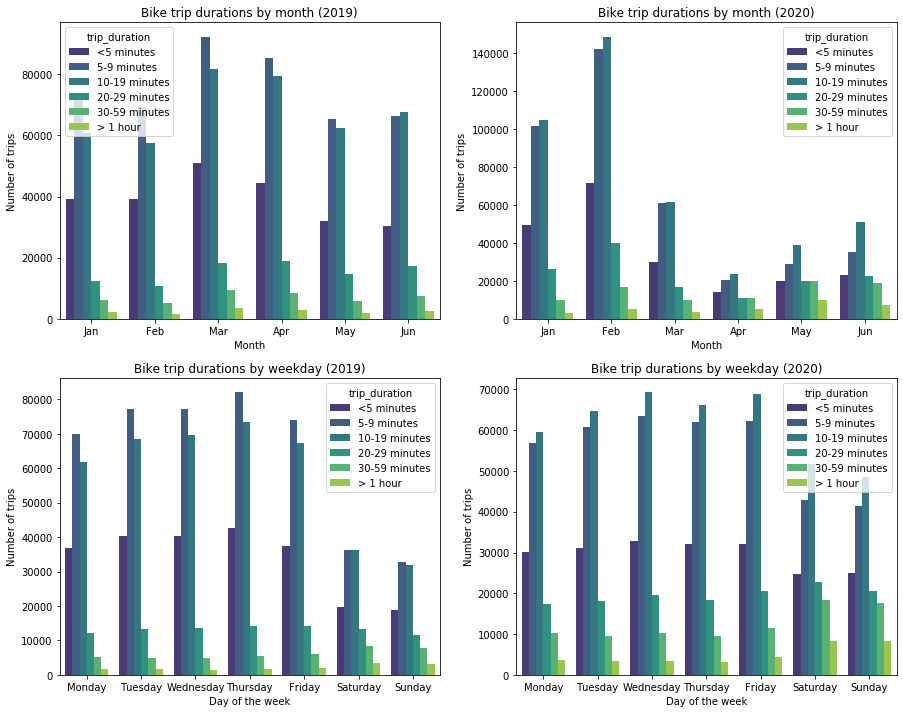

In [73]:
plt.figure(figsize = [15, 12]) # larger figure size for subplots
# by month
# 2019 distribution
plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
# create the plot
sb.countplot(data = explore_19, x = 'month', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('Month')
plt.title('Bike trip durations by month (2019)')

plt.subplot(2, 2, 2) # 2 rows, 2 cols, subplot 2
# create the plot
sb.countplot(data = explore_20, x = 'month', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('Month')
plt.title('Bike trip durations by month (2020)');

# by day of the week
# 2019 distribution
plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
# create the plot
sb.countplot(data = explore_19, x = 'week_day', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('Day of the week')
plt.title('Bike trip durations by weekday (2019)')

plt.subplot(2, 2, 4) # 2 rows, 2 cols, subplot 4
# create the plot
sb.countplot(data = explore_20, x = 'week_day', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('Day of the week')
plt.title('Bike trip durations by weekday (2020)');

In 2019, May and June have less trips below 20 minutes duration than the previous months, but not a lot less trips longer than 20 minutes. From January to May, most bike trips are between 5 and 9 minutes long, in June, most trips are between 10 and 19 minutes long. In 2020, January and February have seen a tremendous increase in number of trips, with February's 10-19 minute trips exceeding 140.000 trips. As expected, March to June show a decrease in the number of trips, and a change in bike trip length. While especially the number of trips below 20 minutes is reduced, the number of trips over 30 minutes and over an hour increases in May and June.

The 2019 visualization for weekday looks similar to the univariate visualization. When evaluating the trip durations, there are obvious differences between weekends and Monday to Friday. While the number of trips below 20 minutes is reduced by far on weekends, trips from 20-29 minutes are similarly as common, and the number of trips over 30 minutes is higher than during the week. When comparing 2019 and 2020, the number of trips below 10 minutes goes down by ca. 10.000 trips per category during the week, while rising on the weekends. The number of trips between 10 and 19 minutes stays almost equal during the week, and rises on the weekends. Trips with a duration over 20 minutes rise on all days of the week, the number of trips longer than 30 minutes increases by far, passing 30.000 trips a day on weekends. 

Next, I am visualizing trip duration by time of day, this time only using the categorical representation. 

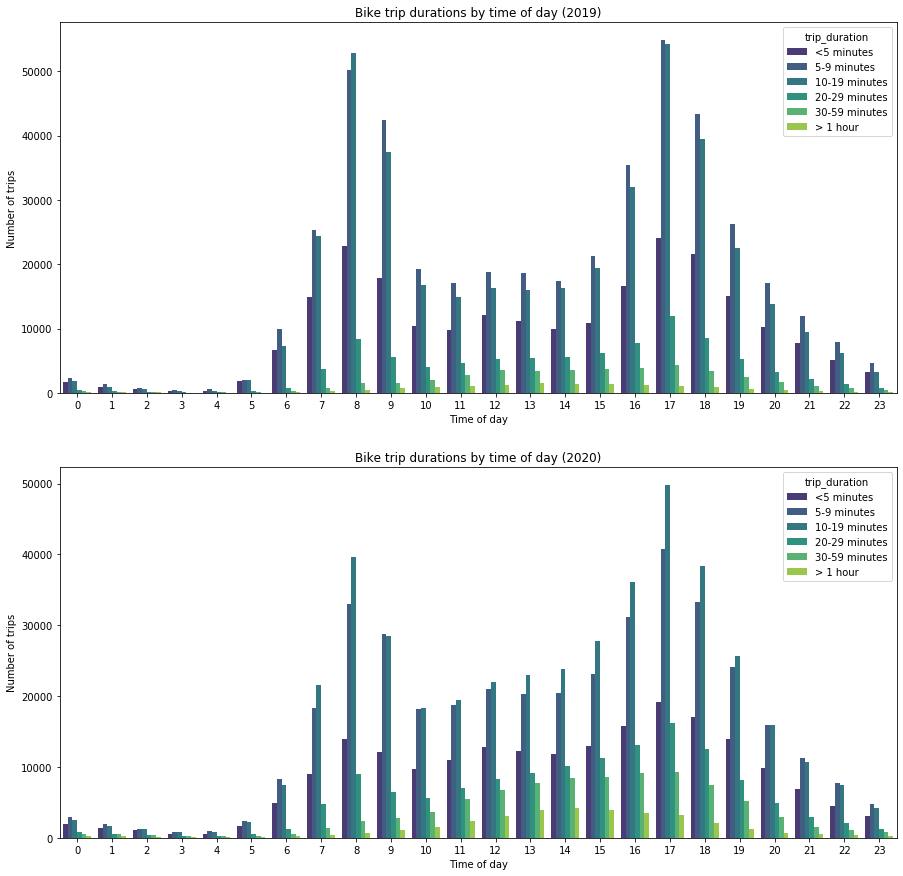

In [74]:
plt.figure(figsize = [15, 15])

# by hour
# 2019 distribution
plt.subplot(2, 1, 1) # 2 rows, 2 cols, subplot 1
# create the plot
sb.countplot(data = explore_19, x = 'hour', hue='trip_duration', palette='viridis')
plt.xlabel('Time of day')
plt.ylabel('Number of trips')
plt.title('Bike trip durations by time of day (2019)')

plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 2
# create the plot
sb.countplot(data = explore_20, x = 'hour', hue='trip_duration', palette='viridis')
plt.xlabel('Time of day')
plt.ylabel('Number of trips')
plt.title('Bike trip durations by time of day (2020)');

In 2019, bike trips with a length up to 10 minutes show a small additional peak at 12pm to the previously observed peaks at 8am and 5pm. This could potentially be related to bikes being used for lunch break food runs. Bike trips above 30 minutes duration do not follow this distribution, but have a left-skewed distribution with the peak at 1pm for 1 hour plus trips, and 5pm for 30 minutes to 1 hour long trips. 2020 shows similar distributions. In comparison to 2019, there is an increase in night time bike rides (e.g. from 12am to 5am). The 8am peak has decreased in number of trips, the second peak at 5pm has significantly more trips in all duration categories. I assume, that 5pm combines a high number of commuter trips with a similarly high number of recreational bike trips. In general, the proportion of longer trips in relation to trips shorter than 20 minutes has increased.  

After evaluating the time variables, I will investigate trip location next, and evaluate if trip durations are differing in relation to start cities. 

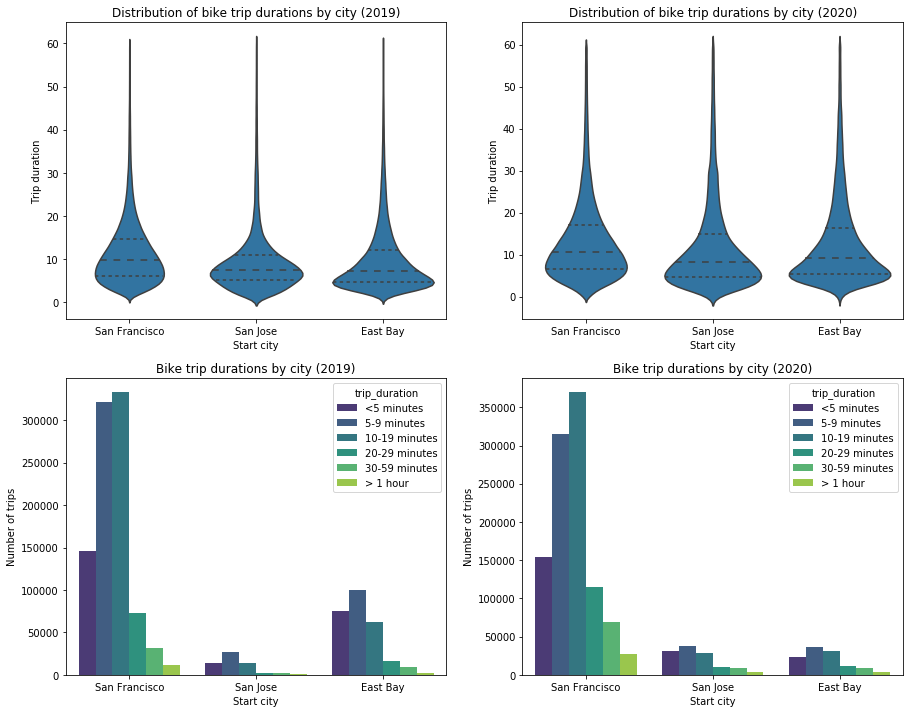

In [75]:
plt.figure(figsize = [15, 12]) # larger figure size for subplots
# 2019 distribution
plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = duration_snapshot_19, x = 'start_city', y='duration_min', color=base_color, inner='quartile')
plt.ylabel('Trip duration')
plt.xlabel('Start city')
plt.title('Distribution of bike trip durations by city (2019)')

plt.subplot(2, 2, 2) # 2 rows, 2 cols, subplot 2
# create the plot
sb.violinplot(data = duration_snapshot_20, x = 'start_city', y='duration_min', color=base_color, inner='quartile')
plt.ylabel('Trip duration')
plt.xlabel('Start city')
plt.title('Distribution of bike trip durations by city (2020)');

# 2019 distribution
plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'start_city', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('Start city')
plt.title('Bike trip durations by city (2019)')

plt.subplot(2, 2, 4) # 2 rows, 2 cols, subplot 4
# create the plot
sb.countplot(data = explore_20, x = 'start_city', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('Start city')
plt.title('Bike trip durations by city (2020)');

The median trip duration in San Francisco is longer than in San Jose and East Bay, at ca. 10 minutes in 2019 and slightly over 10 minutes in 2020. East Bay has the lowest median trip duration in 2019, in 2020 it is slightly above San Jose. San Jose increased in number of trips in all duration categories from 2019 to 2020, East Bay more than halfed in trips below 20 minutes and decreased slightly in number of trips over 20 minutes. In San Francisco, trips shorter than 10 minutes stayed at equal numbers from 2019 to 2020, while the number of trips longer than 10 minutes increased.

Next, I am evaluating trip duration in relation to user type. 

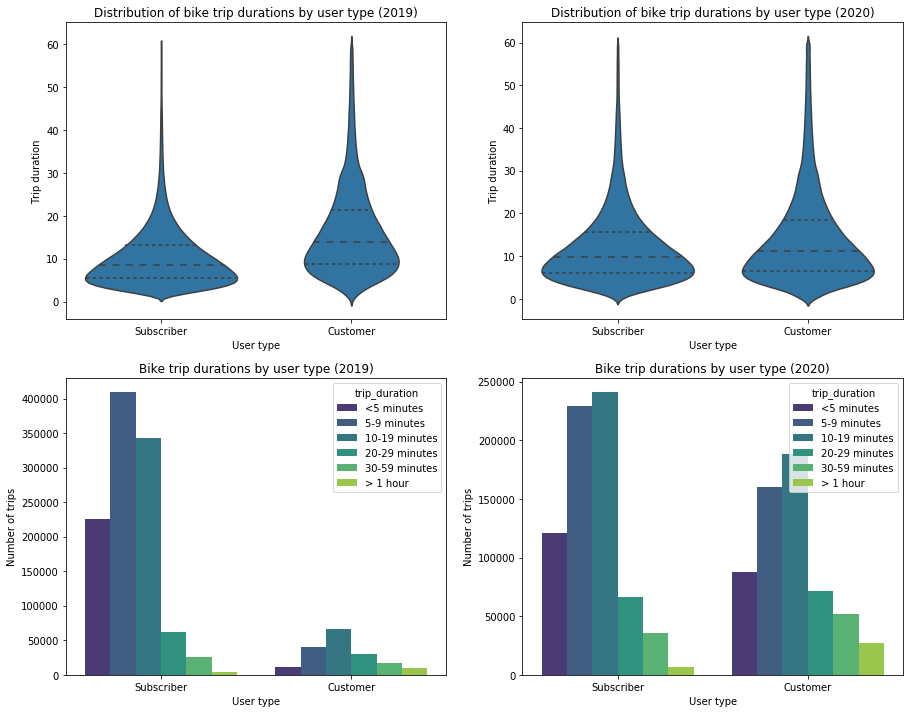

In [76]:
plt.figure(figsize = [15, 12]) # larger figure size for subplots
# 2019 distribution
plt.subplot(2, 2, 1) # 2 rows, 2 cols, subplot 1
# create the plot
base_color = sb.color_palette()[0]
sb.violinplot(data = duration_snapshot_19, x = 'user_type', y='duration_min', color=base_color, inner='quartile')
plt.ylabel('Trip duration')
plt.xlabel('User type')
plt.title('Distribution of bike trip durations by user type (2019)')

plt.subplot(2, 2, 2) # 2 rows, 2 cols, subplot 2
# create the plot
sb.violinplot(data = duration_snapshot_20, x = 'user_type', y='duration_min', color=base_color, inner='quartile')
plt.ylabel('Trip duration')
plt.xlabel('User type')
plt.title('Distribution of bike trip durations by user type (2020)')

# 2019 distribution
plt.subplot(2, 2, 3) # 2 rows, 2 cols, subplot 3
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = explore_19, x = 'user_type', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('User type')
plt.title('Bike trip durations by user type (2019)')

plt.subplot(2, 2, 4) # 2 rows, 2 cols, subplot 4
# create the plot
sb.countplot(data = explore_20, x = 'user_type', hue='trip_duration', palette='viridis')
plt.ylabel('Number of trips')
plt.xlabel('User type')
plt.title('Bike trip durations by user type (2020)');

In 2019, the bike usage of subscribers and customers differs recognizable, when relating user type to trip duration. More than 50% of subscriber trips are shorter than 10 minutes, while customers median trip duration lies closer to 15 minutes. Ca. a quarter of customer trips is longer than 20 minutes. The customer trip duration curve is flatter and more distributed than the subscriber one, and shows an interesting step downwards at 30 minutes. This is potentially related to Bay Wheels pricing system, that charges customers 2 USD for the first 30 minutes and 2 USD more for each additional 15 minutes. In 2020, an interesting change in distributions can be observed. The subscriber curve stays nearly the same, but shows an increase in trips above 20 minutes and an increased median trip duration. The customer distribution now resembles the subscriber one, with a lower median trip duration than in 2019 caused by an extreme increase in shorter trips below 20 minutes. The number of customer trips increased in all categories, also the longer trips, but no category shows a greater increase than the one below 5 minutes. While I can not prove this with the data at hand, I suspect the overall increase in customer trips to be related to Bay area residents looking for social-distance friendly recreational activities, and the increase in trips shorter than 5 minutes with first-time customers testing out if Bay Wheels works for them. 

#### Bivariate explorations independent of bike trip duration
Before moving on to multivariate exploration, I want to explore the user_type feature a bit more, to find further support for my suspicion of subscribers predominantly using Bay Wheels for commuting, and customers using the bike share system predominantly forrecreational purposes. 

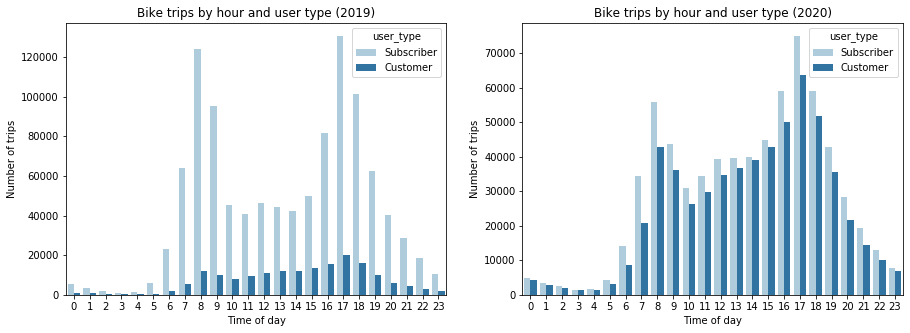

In [77]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
sb.countplot(data = explore_19, x = 'hour', hue='user_type', palette='Paired')
plt.ylabel('Number of trips')
plt.xlabel('Time of day')
plt.title('Bike trips by hour and user type (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
sb.countplot(data = explore_20, x = 'hour', hue='user_type', palette='Paired')
plt.ylabel('Number of trips')
plt.xlabel('Time of day')
plt.title('Bike trips by hour and user type (2020)');

As expected, subscribers follow the bimodal distribution with 8am and 5pm peaks, while customers only have slightly more bike trips at 8am than for the rest of the morning, and increase the number of trips over the course of the day until the late afternoon. In 2020, customer trips are similarly distributed to subscribers. A speculation could be Bay area residents that would usually use public transportation to get to work and around the city are switching to Bay Wheels bikes to avoid crowds. 

Next, I am exploring user type in relation to weekday. 

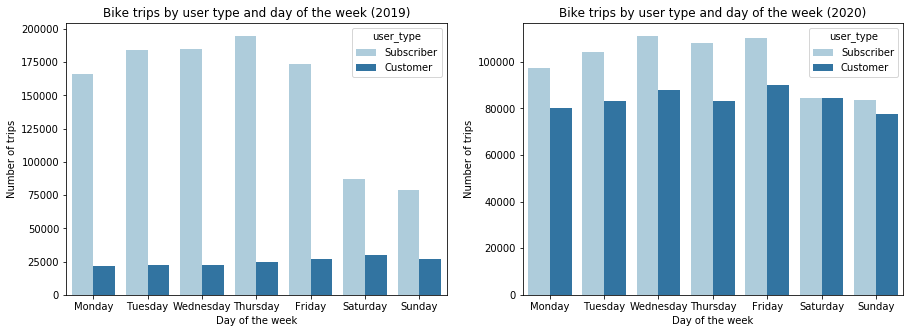

In [78]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
sb.countplot(data = explore_19, x = 'week_day', hue='user_type', palette='Paired')
plt.ylabel('Number of trips')
plt.xlabel('Day of the week')
plt.title('Bike trips by user type and day of the week (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
sb.countplot(data = explore_20, x = 'week_day', hue='user_type', palette='Paired')
plt.ylabel('Number of trips')
plt.xlabel('Day of the week')
plt.title('Bike trips by user type and day of the week (2020)');

In 2019, subscriber trips are most common during the week, weekend days having half of the subscriber trips compared to days during the work week. The number of customer trips does not differ much between weekdays, but has slightly more trips from Friday to Sunday than on the rest of the days. In 2020, the number of subscriber trips decreased by ca. 50.000 trips per day during the work way, and stayed near constant on weekends. Customer trips almost quadrupled during the work week, with most trips on Wednesdays and Fridays. Saturday and Sunday customer trips increased as well, but are not more common than work week days anymore. 

Finally, I am exploring user type in relation to month. 

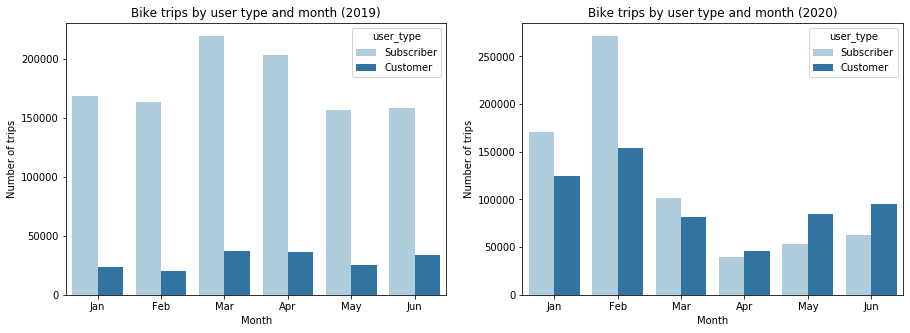

In [79]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
sb.countplot(data = explore_19, x = 'month', hue='user_type', palette='Paired')
plt.ylabel('Number of trips')
plt.xlabel('Month')
plt.title('Bike trips by user type and month (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
sb.countplot(data = explore_20, x = 'month', hue='user_type', palette='Paired')
plt.ylabel('Number of trips')
plt.xlabel('Month')
plt.title('Bike trips by user type and month (2020)');

In 2019, the visualization brings almost no new information in comparison to the univariate explorations of user_type and month. The only observation is a slight increase in customer proportion in relation to subscribers in May and June in comparison to January and February. In 2020, several observations can be made. First, it seems that from 2019 to 2020, Bay Wheels has promoted the customer user type more successful, as January and February have a lot more customer trips in 2020 than in 2019. From January to February 2020, subscriber trips increase by ca. 100.000 trips - and then drop by around 150.000 trips from February to March. Subscriber trips seem to be hit by the lockdown much more than customer trips. Those decrease as well, but by a lower percentage. In April, the number of trips is reduced again, now the subscriber trips fall below the number of customer trips. In May and June, the trip numbers start to recover. The customer trips recover faster and stay on a higher trip number level than the subscriber trips. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The median trip duration slightly increases month over month in 2019, trips are longer on the weekend than on days of the work week. There are more shorter trips around 8 am and 5pm than at other hours of the day, in the afternoon, the median trip duration is longest. The median trip duration in San Francisco is longer than in San Jose and East Bay. On average, customers take longer trips than subscribers. 

Unfortunately, these relationships are not entirely reproducable within the 2020 dataset. The "hidden variable" year, or better the external factors of the Corona-crisis heavily influence the other's features effect on trip duration. In 2020, this shows for month with a rise in median trip duration of ca. 5 minutes from April onwards, for weekday in less short trips on working week days and an increase of trips over 20 minutes duration, especially on weekends. In comparison to 2019, the 8am peak is less dominant, there are more and longer trips in the afternoon. In San Francisco, median trips are still longer than in East Bay and San Jose, and the proportion of trips over 10 minutes increased. Subscribers have longer trip durations than in 2019, customers have shorter trip durations. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In 2019, user type affects the distributions of the time-related variables. Subscribers follow the bimodal distribution with 8am and 5pm peaks, while customers only have slightly more bike trips at 8am than for the rest of the morning, and increase the number of trips over the course of the day until the late afternoon. Subscriber trips are most common during the week, weekend days having half of the subscriber trips compared to days during the work week. The number of customer trips does not differ much between weekdays, but has slightly more trips from Friday to Sunday than on the rest of the days. Month is not affected by user type as clearly, the only observation is a slight increase in customer proportion in relation to subscribers in May and June in comparison to January and February.

Interestingly, the differences between user types are not as prominent in 2020, when customer trips are similarly distributed to subscribers for time of day, and subscriber trips are less focused on the work week. In contrast to this, there are now observable differences between the user types in the month over month overview. Subscriber trips are decreasing  more than customer trips when the lockdown starts, and when the numbers start to recover in  May and June, there are more monthly customer trips than subscriber trips. 

<a id='multi'></a>
## Multivariate Exploration

I am starting the multivariate exploration with a visual representation of the top 10 start locations, combining the start station name, start station latitude and start station longitude features. Judging from the results of the univariate exploration, I expect the stations to be situated in San Francisco, possibly downtown close to business centers. I do not expect a big difference between 2019 and 2020. 

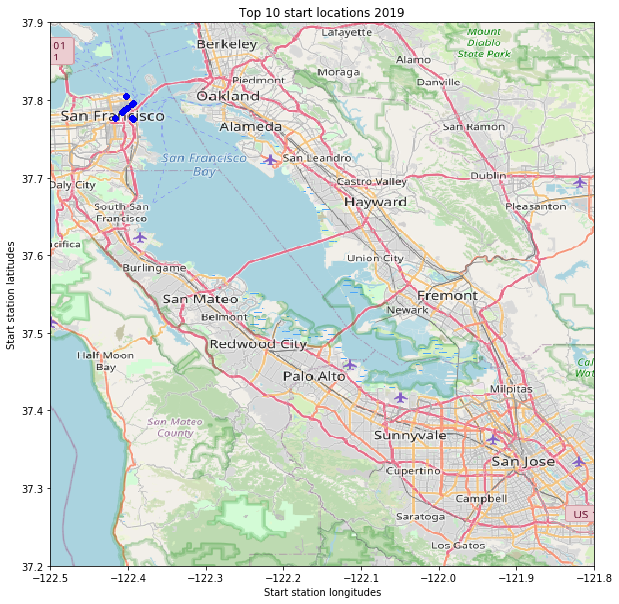

In [80]:
map_edges_19 = (-122.5,-121.8,37.2,37.9)
map_image_19 = plt.imread('bay_area_map.png')
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(trips_top_10_start_19.start_station_longitude, trips_top_10_start_19.start_station_latitude, zorder=1, alpha= 0.2, c='b', s=20)
ax.set_xlim(map_edges_19[0],map_edges_19[1])
ax.set_ylim(map_edges_19[2],map_edges_19[3])
ax.set_title('Top 10 start locations 2019')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_19, zorder=0, extent = map_edges_19, aspect= 'equal');

As expected, the 2019 start stations are located in one specific area in San Francisco. Next, I am zooming in on the map, to get a more detailed overview. 

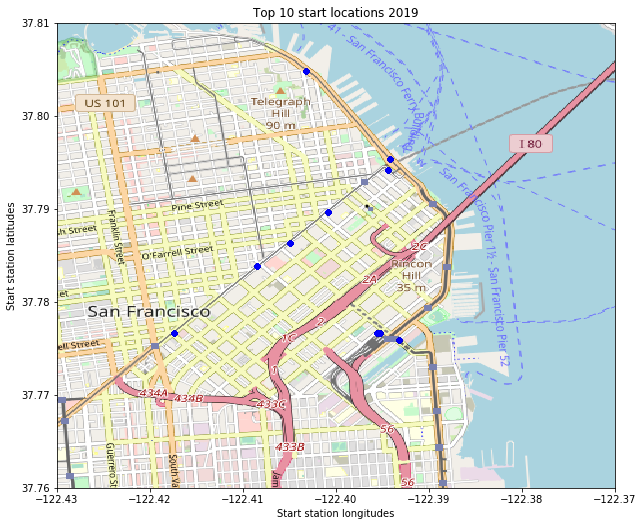

In [81]:
map_edges_19 = (-122.43,-122.37,37.76,37.81)
map_image_19 = plt.imread('sf_top_stations.png')
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(trips_top_10_start_19.start_station_longitude, trips_top_10_start_19.start_station_latitude, zorder=1, alpha= 0.2, c='b', s=20)
ax.set_xlim(map_edges_19[0],map_edges_19[1])
ax.set_ylim(map_edges_19[2],map_edges_19[3])
ax.set_title('Top 10 start locations 2019')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_19, zorder=0, extent = map_edges_19, aspect= 'equal');

The top 10 stations are close to public transport, e.g. the ferry, train station, or commuter tram line. Next, I am using the same map section to visualize 2020's top start stations.

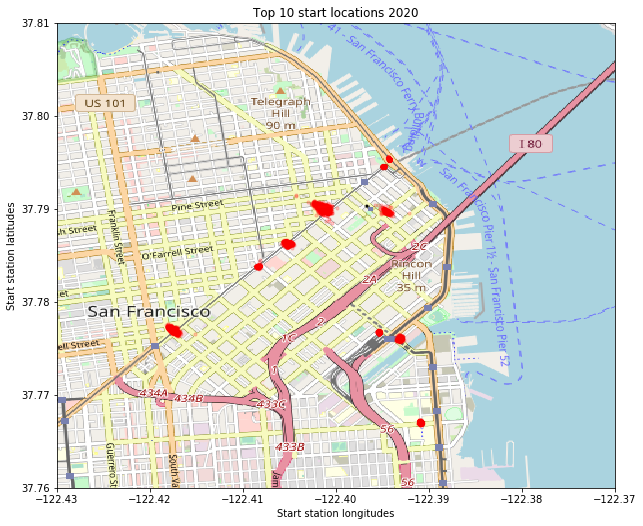

In [82]:
map_edges_20 = (-122.43,-122.37,37.76,37.81)
map_image_20 = plt.imread('sf_top_stations.png')
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(trips_top_10_start_20.start_station_longitude, trips_top_10_start_20.start_station_latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_xlim(map_edges_20[0],map_edges_20[1])
ax.set_ylim(map_edges_20[2],map_edges_20[3])
ax.set_title('Top 10 start locations 2020')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_20, zorder=0, extent = map_edges_20, aspect= 'equal');

The jitter in the above graph shows, that within the 2020 dataset, the stations' latitudes and longitudes are not unique. This explains the crowded visualization in the "Start stations 2020" visualization from the Preliminary Wrangling phase. I will calculate each station_id's mean latitude and longitude, create new columns for those, and visualize the top 10 stations based on the new columns. 

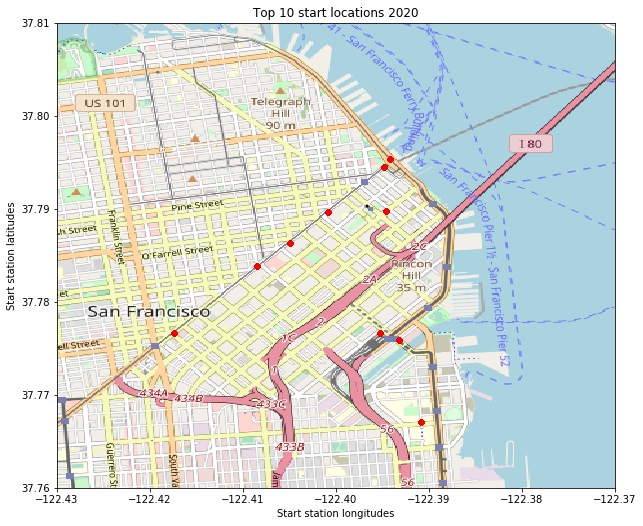

In [83]:
# transformation roughly inspired by https://stackoverflow.com/questions/30244952/how-do-i-create-a-new-column-from-the-output-of-pandas-groupby-sum
trips_top_10_start_20['start_lat'] = trips_top_10_start_20['start_station_latitude'].groupby(trips_top_10_start_20['start_station_id']).transform('mean')
trips_top_10_start_20['start_long'] = trips_top_10_start_20['start_station_longitude'].groupby(trips_top_10_start_20['start_station_id']).transform('mean')

map_edges_20 = (-122.43,-122.37,37.76,37.81)
map_image_20 = plt.imread('sf_top_stations.png')
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(trips_top_10_start_20.start_long, trips_top_10_start_20.start_lat, zorder=1, alpha= 0.2, c='r', s=20)
ax.set_xlim(map_edges_20[0],map_edges_20[1])
ax.set_ylim(map_edges_20[2],map_edges_20[3])
ax.set_title('Top 10 start locations 2020')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_20, zorder=0, extent = map_edges_20, aspect= 'equal');

Similar to 2019, the top 10 start stations in 2020 are located at commuter hubs in San Francisco. 

Next, I am continuing to visualize spatial data by visualizing the trip duration in minutes by start station on a map. I am using a color bar to represent the duration minutes, and only visualize a duration snapshot of up to 60 minutes trip duration. Also, I am loading in a black and white map this time, to make the color code stand out more. 

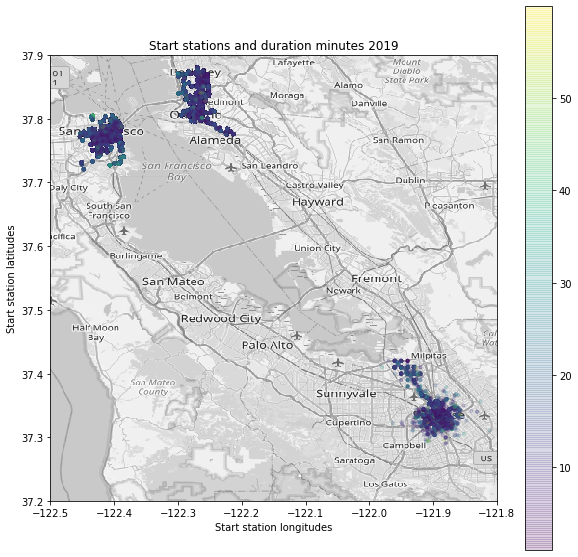

In [84]:
map_edges_19 = (-122.5,-121.8,37.2,37.9)
map_image_19 = plt.imread('bay_area_map_bw.png')
cm = plt.cm.get_cmap('viridis')
fig, ax = plt.subplots(figsize = (10,10))
sc = ax.scatter(duration_snapshot_19.start_station_longitude, duration_snapshot_19.start_station_latitude, zorder=1, alpha= 0.2, c=duration_snapshot_19.duration_min, s=10, cmap=cm)
plt.colorbar(sc)
ax.set_xlim(map_edges_19[0],map_edges_19[1])
ax.set_ylim(map_edges_19[2],map_edges_19[3])
ax.set_title('Start stations and duration minutes 2019')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_19, zorder=0, extent = map_edges_19, aspect= 'equal')
plt.show();

In 2019, the majority of the duration markers is violet and blue, representing shorter trips. Turquoise and green markers are more prominent in the outskirts of the three cities than in the center. Next, I am visualizing the same data for 2020.

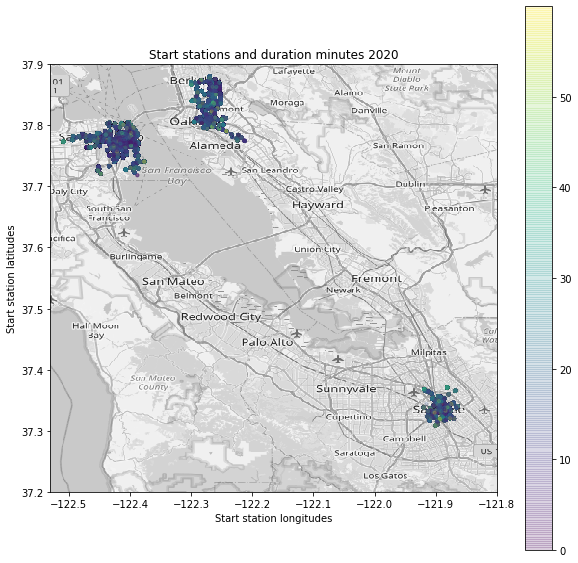

In [85]:
explore_20['start_lat'] = explore_20['start_station_latitude'].groupby(explore_20['start_station_id']).transform('mean')
explore_20['start_long'] = explore_20['start_station_longitude'].groupby(explore_20['start_station_id']).transform('mean')

new_duration_snapshot_20 = explore_20.query('duration_min < 60')

map_edges_20 = (-122.53,-121.8,37.2,37.9)
map_image_20 = plt.imread('bay_area_map_bw.png')
cm = plt.cm.get_cmap('viridis')
fig, ax = plt.subplots(figsize = (10,10))
sc = ax.scatter(new_duration_snapshot_20.start_long, new_duration_snapshot_20.start_lat, zorder=1, alpha= 0.2, c=new_duration_snapshot_20.duration_min, s=10, cmap=cm)
plt.colorbar(sc)
ax.set_xlim(map_edges_20[0],map_edges_20[1])
ax.set_ylim(map_edges_20[2],map_edges_20[3])
ax.set_title('Start stations and duration minutes 2020')
ax.set_xlabel('Start station longitudes')
ax.set_ylabel('Start station latitudes')
ax.imshow(map_image_20, zorder=0, extent = map_edges_20, aspect= 'equal')
plt.show();

In 2020, there is less violet and blue on the map, trip durations have become longer. Green, and even yellowish markers are more common, and found both in the centers and the outskirts of the three cities. 

Finally, I am going to evaluate two multivariate feature combinations. First, I am visualizing the average trip duration by month by weekday, then I am evaluating average trip duration by user type by city. The first visualization will potentially strengthen the observations from the bi-variate exploration, the second is going to give a new perspective on regional trip duration differences. 

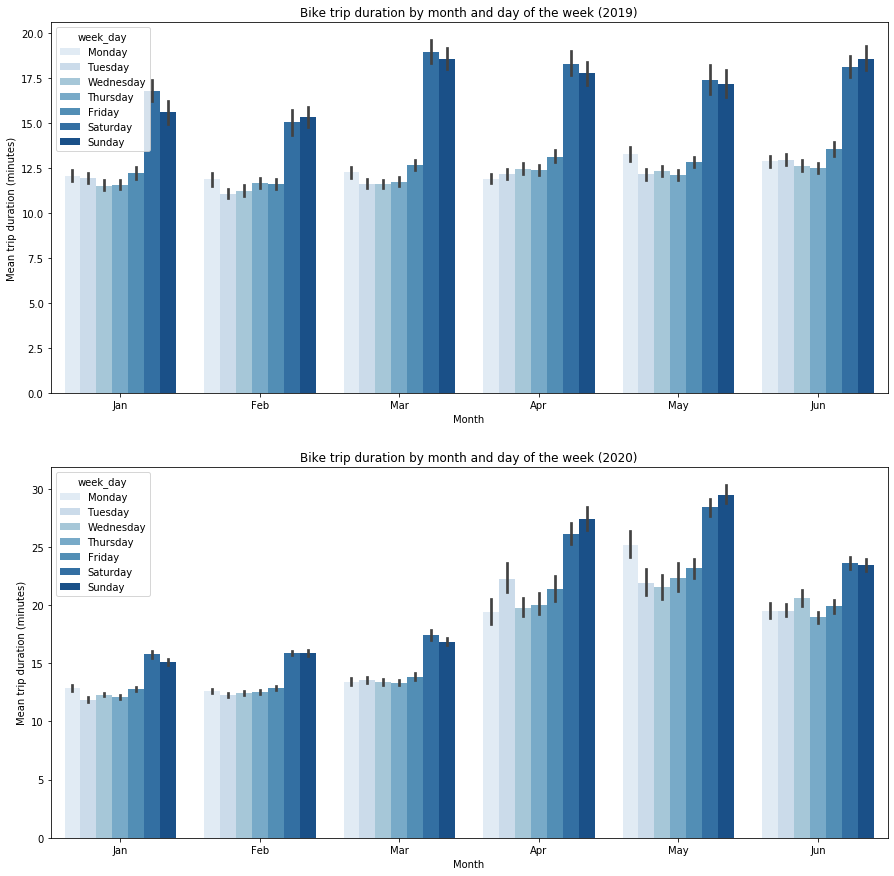

In [86]:
plt.figure(figsize = [15, 15])
# 2019 distribution
plt.subplot(2, 1, 1) # 2 rows, 1 col, subplot 1
# create the plot
sb.barplot(data = explore_19, x = 'month', y = 'duration_min', hue='week_day', palette='Blues')
plt.ylabel('Mean trip duration (minutes)')
plt.xlabel('Month')
plt.title('Bike trip duration by month and day of the week (2019)')

# 2020 distribution
plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 2
# create the plot
sb.barplot(data = explore_20, x = 'month', y = 'duration_min', hue='week_day', palette='Blues')
plt.ylabel('Mean trip duration (minutes)')
plt.xlabel('Month')
plt.title('Bike trip duration by month and day of the week (2020)');

The 2019 visualization shows the slight average trip duration increase month over month, and longer trip duration on weekends than weekdays, that is already known from the bivariate exploration. Also, it shows, that the weekday with the highest trip duration average is not constant over the months, and that the monthly difference in average trip durations is most prominent on the weekends, with not much change between months on work week days. In 2020, January to March look similar to 2019, from April onwards, the expected change happens. Average trip durations get longer, at the same time variability for trip duration increases. Especially in April and May, the work week trip durations are not as close together as before, with the average trip being longer on Tuesdays in April, and Mondays in May. In June, average trip duration is still longer than in Q1 2020, but the variability decreases, and the difference between weeekend and weekday average trip durations starts to resemble 2019 and Q1 2020 again.

Next, I am visualizing average trip duration by user type by start city. 

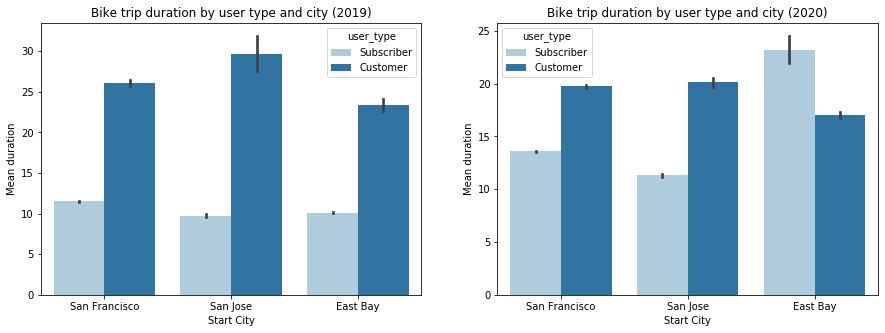

In [87]:
plt.figure(figsize = [15, 5])
# 2019 distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# create the plot
sb.barplot(data = explore_19, x = 'start_city', y = 'duration_min', hue='user_type', palette='Paired')
plt.ylabel('Mean duration')
plt.xlabel('Start City')
plt.title('Bike trip duration by user type and city (2019)')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# create the plot
sb.barplot(data = explore_20, x = 'start_city', y = 'duration_min', hue='user_type', palette='Paired')
plt.ylabel('Mean duration')
plt.xlabel('Start City')
plt.title('Bike trip duration by user type and city (2020)');

In the bivariate exploration, median customer trip durations were longer than subscriber trip durations, and San Francisco's median trip duration was longer than that of the other two cities. Here, it seems that customers and subscribers behave different in different regions. In San Francisco in 2019, the average subscriber trip is longest at around 12 minutes. The average customer trip is at  around 27 minutes. In East Bay, the average subscriber trip is ca. 9 minutes long. Customer trips in East Bay are on average around 23 minutes, in San Jose close to 30 minutes and thereby longest of all cities. East Bay customer trips show the highest variability. 

In 2020, the average trip duration for subscribers increases by a few minutes in San Francisco and San Jose - and more than doubles in East Bay. Average trip duration for customers stays similar to 2019 levels in San Francisco and East Bay, but decreases in San Jose. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The map visualizations strengthened the hypothesis, that the bike share system is largely used by commuters. The visualization of bike trips per weekday per month confirmed, that weekday had a stronger impact on trip duration than month in 2019, and that the bike trip duration changed in the months impacted by the Corona crisis and lockdown. 

### Were there any interesting or surprising interactions between features?

It was surprising to see, that the impact user type had on trip duration was different from city to city, and that the trip duration per user type changed in different ways from 2019 to 2020 depending on the region. E.g. I was suprised to see that the average customer trip duration decreased in San Jose. 

In [88]:
# storing the explore_19 and explore_20 in csv for further use in the presentation
explore_19.to_csv('bike-share-data-2019-visualize.csv', index=False, encoding = 'utf-8')
explore_20.to_csv('bike-share-data-2020-visualize.csv', index=False, encoding = 'utf-8')